In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from IPython.display import Image
import math
import rsa

 # <center>Equivalence Classes and Modular Arithmetic in the Cryptography World</center>
## <center> How does it work and is it secure?</center>

#### **Content**<br>

I. Equivalence Classes<br>
1. What are equivalence classes<br>
2. What properties do the equivalence classes have?<br>
2.1 Reflexivity<br>
2.1.1 Reflexivity with a function for a specified number a<br>
2.1.2 Reflexivity without a function for a random number a<br>
2.2 Symmetry<br>
2.2.1 Symmetry with a function for a specified number a<br>
2.2.2 Symmetry without a function for a random number a<br>
2.3 Transitivity<br>
2.3.1 Transitivity with a function for a specified number a<br>
2.3.2 Transitivity without a function for a random number a<br>

II. Modular Arithmetic<br>
1. Properties of modular arithmetic<br>
1.1 Congruence<br>
1.2 Addition<br>
1.2.1. Addition property #1<br>
1.2.2 Addition property #2<br>
1.2.3 Addition property #3<br>
1.2.3 Addition property #3<br>
1.3 Multiplication<br>
1.3.1 Multiplication property #1<br>
1.3.2 Multiplication property #2<br>
1.3.3 Multiplication property #3<br>
1.4 Exponentiation<br>
1.4.1 Exponentiation property #1<br>
2. Usecase in cryptography<br>
2.1. Caesar Cipher<br>
2.2. RSA algorithm<br>
2.3. Diffie-Hellman algorithm<br>
3. RSA Algorithm<br>
3.1 RSA Algorithm - Step by Step Recreation<br>
3.2 Hack the RSA Algorithm<br>
3.2.1 Step by step recreation (eavesdropping side)<br>
3.2.2 Function recreation<br>
3.2.3 Testing<br>
3.2.4 Function optimization<br>
3.2.5 Testing 2.0 and Result Visualization<br>
4. Dilfie Hellman Method<br>
4.1 Diffie Hellman Method - Step by Step Recreation<br>
4.2 Hack the Diffie Hellman Method<br>
4.2.1 Step by step recreation (eavesdropping side)<br>
4.2.2 Function recreation<br>
4.2.3 Testing<br>
4.2.4 Function optimization<br>
4.2.5 Testing 2.0<br>
4.2.6 Result Visualization<br>
5. Comparison and Conclusion<br>
6. Bonus: Case study<br>
6.1 Caesar Cipher<br>
6.2 RSA Algorithm

#### **Introduction:**

Mathematics is a fundamental part of our lives and vital for the moden world including science, technology and engineering, all of which see a rapid development in the last 2 decades. Especially the technology which changed the completely the way we shop, read, eat, sleep, party and even the way we spend our time every day. Well nothing of this would be possible if we did not have the important role of Mathematics as a base. The developers managed to develop modern websites, so that we can shop and pay online. Furthermore, the access to an information has never been easier. We can find in couple of minutes the answer in Google, Youtube or somewhere else in the internet. Well, this booming development of the technology had also some risks with it. With the increase of the internet usage, we had to share our private information, which of course must be good protected.<br>

In this project I will research and show how some Math concepts are the base of the modern cybersecurity. First I will take a look into the equivalence classes theory which is the base of the modular arithmetic, which will be our second topic. After we get enough knowledge and theory for these 2 concepts, I will introduce 3 cryptographic algorithms that are based on the modular arithmetic and will explain all of them, after which I will try to hack them so that I can prove how secure are they.<br>

In the end, I will check a case study so that we can use some of the introduced algorithms in the praxis.


## I. Equivalence Classes

#### 1. What are equivalence classes?

**General definition:**<br>
Well, let's start with the definitian of what is an equivalence class. According to [Wikipedia](https://en.wikipedia.org/wiki/Equivalence_class): *"In mathematics, when the elements of some set S have a notion of equivalence (formalized as an equivalence relation), then one may naturally split the set S into equivalence classes. These equivalence classes are constructed so that elements a and b belong to the same equivalence class if, and only if, they are equivalent."*<br>
$$\{ x \in S: x\sim a \}$$

**Revised definition for the purpose of this project:**<br>
For the purpose of this project, I will revise the general definition and will simplify it to: *"A subset of integers all of which have the same remainder when divided by n."*<br>

Now let's see some examples:

In [3]:
# 1. I will create a function for generating a random integer list:

def random_integer_list(n, x_min, x_max):
    random_list = []
    for i in range (0,n):
        n = random.randint(x_min,x_max)
        random_list.append(n)
    return random_list

In [4]:
# 2. Testing the function:

random_numbers = random_integer_list(15, 0, 1000)
random_numbers

[217, 167, 424, 34, 961, 59, 304, 726, 67, 496, 857, 23, 453, 14, 730]

In [5]:
# 3. Now I want to create a function which will sort the numbers to the specified equivalence classes (equivalence class 1 should have all the integers that have remainder 1 when divided by the modulo):

def sorting_to_equivalence_classes (modulo, numbers, equivalence_class):
    equivalence_class_list = []
    for i in numbers:
        if i%modulo == equivalence_class:
            equivalence_class_list.append(i)
        else:
            pass   
    return equivalence_class_list

In [6]:
# 4. Now let's test this function also:

print(sorting_to_equivalence_classes(2, random_numbers, 0))
print(sorting_to_equivalence_classes(5, random_numbers, 2))
print(sorting_to_equivalence_classes(7, random_numbers, 1))
print(sorting_to_equivalence_classes(9, random_numbers, 3))
print(sorting_to_equivalence_classes(2, random_numbers, 2)) #Negative test

[424, 34, 304, 726, 496, 14, 730]
[217, 167, 67, 857]
[]
[453]
[]


Well, it looks that the two functions work well. Now I want to go deeper and check what properties do the equivalence classes have and how do they work.

#### 2. What Properties do the equivalence classes have?

According to the theory, the equivalence classes have 3 important properties:
- **reflexivity**: Any a in X must always be equivalent to itself:
$$ a \sim a \vert \forall  a\in X$$
- **symmetry**: Suppose a, b are in X. Then, if a is equivalent to b, b will also be equivalent to a. 
$$ a \sim b  \Rightarrow  b\sim a \vert \forall a,b \in X$$
- **transitivity**: Suppose a, b, and c be elements of X. Then, if a is equivalent to b, and b is equivalent to c, a will also be equivalent to c. 
$$ a \sim b \land b \sim c \Rightarrow  c\sim a \vert \forall a,b,c \in X$$

Source: [StatisticsHowTo](https://www.statisticshowto.com/equivalence-class/#:~:text=An%20equivalence%20class%20is%20the,%2C%20they're%20called%20equivalent.)

After we defined the properties of the equivalent classes, I would want to prove them with real examples. I want to do the proof in 2 ways. The first one would be to create a function which accepts parameters and returns whether 2 numbers are e.g symmetric. Second, I would like to write a code that checks the propoerties for random generated numbers. I will follow this struture for all three properties, so lets see.

##### 2.1 Reflexivity

In [7]:
# Function for generating a random number:
def random_number(x_min,x_max):
    a = random.randint(x_min,x_max)
    return a

##### 2.1.1 Reflexivity with a function for a specified number a:

In [8]:
def is_reflexiv (modulo, a):
    
    equivalence_class = a%modulo
    
    if equivalence_class == a%modulo:
        print(f"Yes, a (in this example = {a}) is reflexiv.")
    else:
        print(f"No, a (in this example = {a}) is not reflexiv.")

In [9]:
is_reflexiv(3, 8)

Yes, a (in this example = 8) is reflexiv.


##### 2.1.2 Reflexivity without a function for a random number a:

In [10]:
# First, I will get a random integer (in the range of 0-1000) and check his equivalence class with a specified modulo.

a_reflexivity = random_number(0, 1000)
print(f"The random number is {a_reflexivity}")
modulo_reflexivity = int(input("Please enter a desired modulo:"))

equivalence_class_reflexivity = a_reflexivity%modulo_reflexivity
print(f"The equivalence class of {a_reflexivity} with modulo {modulo_reflexivity} is {equivalence_class_reflexivity}")


The random number is 855


Please enter a desired modulo: 3


The equivalence class of 855 with modulo 3 is 0


In [11]:
# Now I want to check that a is equivalent to itself. It should be the sam equivalence class:

equivalence_class_rexlexivity_check = a_reflexivity%modulo_reflexivity

if equivalence_class_rexlexivity_check == equivalence_class_reflexivity:
    print(f"Yes, a (in this example = {a_reflexivity}) is reflexiv.")
else:
    print(f"No, a (in this example = {a_reflexivity}) is not reflexiv.")

Yes, a (in this example = 855) is reflexiv.


Well, it looks a little bit strange, but it has been proved that a is equivalent to itself and belongs to the same equivalence class.

##### 2.2 Symmetry

##### 2.2.1 Symmetry with a function for a specified number a:

In [12]:
def is_symmetric(x_min, x_max, modulo, a, b):
    equivalence_class_a = a%modulo
    equivalence_class_b = b%modulo
    equivalence_class_b_check = b%modulo
    equivalence_class_a_check = a%modulo
    
    if equivalence_class_a == equivalence_class_b and equivalence_class_b_check == equivalence_class_a_check:
        print(f"Yes, a ({a}) is equivalent to b ({b}), because they belong to the same equivalence class ({equivalence_class_b_check}) with modulo ({modulo}). This means that a and b are symmetric.")
    else:
        print(f"No, a ({a}) and b ({b}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo}).")


Ok, now lets check whether our function works with 2 examples. I will give the first example parameters, which should return a positive result and then I will test in the second example with parameters that should return a negative result:

In [13]:
is_symmetric(0, 1000, 3, 8, 11)
is_symmetric(0, 1000, 3, 8, 12)

Yes, a (8) is equivalent to b (11), because they belong to the same equivalence class (2) with modulo (3). This means that a and b are symmetric.
No, a (8) and b (12) are not equivalent, because they do not belong to the same equivalence class with modulo (3).


Ok, looks good. Now I will try to do this for a random number:

In [14]:
### First I will set different random classes so that I can enter the while-loop
equivalence_class_a_symmetry = -1
equivalence_class_b_symmetry = 0

# The while loop will search for 2 random numbers that are equivalent with a specified modulo.

while equivalence_class_a_symmetry != equivalence_class_b_symmetry:
    a_symmetry = random_number(0, 1000)
    b_symmetry = random_number(0,1000)
    print(f"The random number a is {a_symmetry} and the random number b is {b_symmetry}")
    modulo_symmetry = int(input("Please enter a desired modulo:"))

    equivalence_class_a_symmetry = a_symmetry%modulo_symmetry
    equivalence_class_b_symmetry = b_symmetry%modulo_symmetry
    print(f"The equivalence class of {a_symmetry} with modulo {modulo_symmetry} is {equivalence_class_a_symmetry}")
    print(f"The equivalence class of {b_symmetry} with modulo {modulo_symmetry} is {equivalence_class_b_symmetry}")
    
# If we find two random numbers that are in the same equivalence class they are equivalent each other.

    if equivalence_class_a_symmetry == equivalence_class_b_symmetry:
        print(f"Yes, a ({a_symmetry}) is equivalent to b ({b_symmetry}), because they belong to the same equivalence class ({equivalence_class_a_symmetry}) with modulo ({modulo_symmetry}).")
    else:
        print(f"No, a ({a_symmetry}) and b ({b_symmetry}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo_symmetry}). Try again")
    
# Now lets check whether b is equivalent to a:
    equivalence_class_b_symmetry_check = b_symmetry%modulo_symmetry
    equivalence_class_a_symmetry_check = a_symmetry%modulo_symmetry
    
    if equivalence_class_b_symmetry_check == equivalence_class_a_symmetry_check:
        print(f"Yes, b ({b_symmetry}) is also equivalent to a ({a_symmetry}), because they belong to the same equivalence class ({equivalence_class_b_symmetry_check}) with modulo ({modulo_symmetry}). This means that a and b are symmetric.")
    else:
        print(f"No, a ({a_symmetry}) and b ({b_symmetry}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo_symmetry}).")


The random number a is 204 and the random number b is 715


Please enter a desired modulo: 11


The equivalence class of 204 with modulo 11 is 6
The equivalence class of 715 with modulo 11 is 0
No, a (204) and b (715) are not equivalent, because they do not belong to the same equivalence class with modulo (11). Try again
No, a (204) and b (715) are not equivalent, because they do not belong to the same equivalence class with modulo (11).
The random number a is 693 and the random number b is 774


Please enter a desired modulo: 11


The equivalence class of 693 with modulo 11 is 0
The equivalence class of 774 with modulo 11 is 4
No, a (693) and b (774) are not equivalent, because they do not belong to the same equivalence class with modulo (11). Try again
No, a (693) and b (774) are not equivalent, because they do not belong to the same equivalence class with modulo (11).
The random number a is 894 and the random number b is 507


Please enter a desired modulo: 7


The equivalence class of 894 with modulo 7 is 5
The equivalence class of 507 with modulo 7 is 3
No, a (894) and b (507) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Try again
No, a (894) and b (507) are not equivalent, because they do not belong to the same equivalence class with modulo (7).
The random number a is 668 and the random number b is 303


Please enter a desired modulo: 7


The equivalence class of 668 with modulo 7 is 3
The equivalence class of 303 with modulo 7 is 2
No, a (668) and b (303) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Try again
No, a (668) and b (303) are not equivalent, because they do not belong to the same equivalence class with modulo (7).
The random number a is 292 and the random number b is 221


Please enter a desired modulo: 7


The equivalence class of 292 with modulo 7 is 5
The equivalence class of 221 with modulo 7 is 4
No, a (292) and b (221) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Try again
No, a (292) and b (221) are not equivalent, because they do not belong to the same equivalence class with modulo (7).
The random number a is 884 and the random number b is 127


Please enter a desired modulo: 7


The equivalence class of 884 with modulo 7 is 2
The equivalence class of 127 with modulo 7 is 1
No, a (884) and b (127) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Try again
No, a (884) and b (127) are not equivalent, because they do not belong to the same equivalence class with modulo (7).
The random number a is 599 and the random number b is 185


Please enter a desired modulo: 7


The equivalence class of 599 with modulo 7 is 4
The equivalence class of 185 with modulo 7 is 3
No, a (599) and b (185) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Try again
No, a (599) and b (185) are not equivalent, because they do not belong to the same equivalence class with modulo (7).
The random number a is 654 and the random number b is 87


Please enter a desired modulo: 7


The equivalence class of 654 with modulo 7 is 3
The equivalence class of 87 with modulo 7 is 3
Yes, a (654) is equivalent to b (87), because they belong to the same equivalence class (3) with modulo (7).
Yes, b (87) is also equivalent to a (654), because they belong to the same equivalence class (3) with modulo (7). This means that a and b are symmetric.


Well, this one looks also good. I tested multiple times mostly with modulo of 3. Some of the text printed can be hidden, but I will leave it like this for now so that it is clear what numbers we get and what exactly happens.

##### 2.3 Transitivity

##### 2.3.1 Transitivity with a function for specified numbers a, b, c:

In [15]:
def is_transitiv(x_min, x_max, modulo, a, b, c):
    equivalence_class_a = a%modulo
    equivalence_class_b = b%modulo
    equivalence_class_c = c%modulo
    
    equivalence_class_a_check = a%modulo
    equivalence_class_b_check = b%modulo
    equivalence_class_c_check = c%modulo

    if equivalence_class_a == equivalence_class_b and equivalence_class_b_check == equivalence_class_a_check:
        print(f"Yes, a ({a}) is equivalent to b ({b}), because they belong to the same equivalence class ({equivalence_class_a}) with modulo ({modulo}).")
        if equivalence_class_b == equivalence_class_c and equivalence_class_c_check == equivalence_class_b_check:
            print(f"Yes, b ({b}) is equivalent to c ({c}), because they belong to the same equivalence class ({equivalence_class_b}) with modulo ({modulo}).")
            if equivalence_class_a == equivalence_class_c and equivalence_class_c_check == equivalence_class_a_check:
                print(f"Yes, a ({a}) is equivalent to c ({c}), because they belong to the same equivalence class ({equivalence_class_a}) with modulo ({modulo}). Thus a ({a}), b ({b}) and c ({c}) are all equivalent.")
        else:
            print(f"No, b ({b}) and c ({c}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo}). Thus a ({a}), b ({b}) and c ({c}) are not all equivalent.")
    else:
        print(f"No, a ({a}) and b ({b}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo}). Thus a ({a}), b ({b}) and c ({c}) are not all equivalent.")


Well, our function is ready. Now lets test it. I would meka in total 4 tests:
- Test #1 will be the positive one, so it will print in total 3 rows.
- Test #2 will be a negative one for the parameter a.
- Test #3 will be a negative one for the parameter b.
- Test #4 will be a negative one for the parameter c.

In [16]:
is_transitiv(0, 1000, 3, 5, 8, 11)
is_transitiv(0, 1000, 3, 6, 8, 11)
is_transitiv(0, 1000, 3, 5, 9, 11)
is_transitiv(0, 1000, 3, 5, 9, 12)

Yes, a (5) is equivalent to b (8), because they belong to the same equivalence class (2) with modulo (3).
Yes, b (8) is equivalent to c (11), because they belong to the same equivalence class (2) with modulo (3).
Yes, a (5) is equivalent to c (11), because they belong to the same equivalence class (2) with modulo (3). Thus a (5), b (8) and c (11) are all equivalent.
No, a (6) and b (8) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (6), b (8) and c (11) are not all equivalent.
No, a (5) and b (9) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (5), b (9) and c (11) are not all equivalent.
No, a (5) and b (9) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (5), b (9) and c (12) are not all equivalent.


The tests were here also successful. The first one returned 3 rows and showed us that the a,b and c are equivalent each other. The other test were negative and each one returned a negative answer.

##### 2.3.2 Transitivity without a function for random numbers a, b, c:

In [17]:
# 3.1 First I will set different random classes so that I can enter the while-loop
equivalence_class_a_transitivity = -2
equivalence_class_b_transitivity = -1
equivalence_class_c_transitivity = 0

# 3.2 The while loop will search for 2 random numbers that are equivalent with a specified modulo.

while not equivalence_class_a_transitivity == equivalence_class_b_transitivity == equivalence_class_c_transitivity:
    a_transitivity = random_number(0, 1000)
    b_transitivity = random_number(0,1000)
    c_transitivity = random_number(0,1000)
    print(f"The random number a is {a_transitivity}. The random number b is {b_transitivity} and the random number c is {c_transitivity}")
    modulo_transitivity = int(input("Please enter a desired modulo:"))

    equivalence_class_a_transitivity = a_transitivity%modulo_transitivity
    equivalence_class_b_transitivity = b_transitivity%modulo_transitivity
    equivalence_class_c_transitivity = c_transitivity%modulo_transitivity
    print(f"The equivalence class of {a_transitivity} with modulo {modulo_transitivity} is {equivalence_class_a_transitivity}")
    print(f"The equivalence class of {b_transitivity} with modulo {modulo_transitivity} is {equivalence_class_b_transitivity}")
    print(f"The equivalence class of {c_transitivity} with modulo {modulo_transitivity} is {equivalence_class_c_transitivity}")

    if equivalence_class_a_transitivity == equivalence_class_b_transitivity:
        print(f"Yes, a ({a_transitivity}) is equivalent to b ({b_transitivity}), because they belong to the same equivalence class ({equivalence_class_a_transitivity}) with modulo ({modulo_transitivity}).")
        if equivalence_class_b_transitivity == equivalence_class_c_transitivity:
            print(f"Yes, b ({b_transitivity}) is equivalent to c ({c_transitivity}), because they belong to the same equivalence class ({equivalence_class_b_transitivity}) with modulo ({modulo_transitivity}).")
            if equivalence_class_a_transitivity == equivalence_class_c_transitivity:
                print(f"Yes, a ({a_transitivity}) is equivalent to c ({c_transitivity}), because they belong to the same equivalence class ({equivalence_class_a_transitivity}) with modulo ({modulo_transitivity}). Thus a ({a_transitivity}), b ({b_transitivity}) and c ({c_transitivity}) are all equivalent.")
        else:
            print(f"No, b ({b_transitivity}) and c ({c_transitivity}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo_transitivity}). Thus a ({a_transitivity}), b ({b_transitivity}) and c ({c_transitivity}) are not all equivalent.")
    else:
        print(f"No, a ({a_transitivity}) and b ({b_transitivity}) are not equivalent, because they do not belong to the same equivalence class with modulo ({modulo_transitivity}). Thus a ({a_transitivity}), b ({b_transitivity}) and c ({c_transitivity}) are not all equivalent.")


The random number a is 159. The random number b is 516 and the random number c is 231


Please enter a desired modulo: 11


The equivalence class of 159 with modulo 11 is 5
The equivalence class of 516 with modulo 11 is 10
The equivalence class of 231 with modulo 11 is 0
No, a (159) and b (516) are not equivalent, because they do not belong to the same equivalence class with modulo (11). Thus a (159), b (516) and c (231) are not all equivalent.
The random number a is 331. The random number b is 992 and the random number c is 994


Please enter a desired modulo: 7


The equivalence class of 331 with modulo 7 is 2
The equivalence class of 992 with modulo 7 is 5
The equivalence class of 994 with modulo 7 is 0
No, a (331) and b (992) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Thus a (331), b (992) and c (994) are not all equivalent.
The random number a is 555. The random number b is 140 and the random number c is 739


Please enter a desired modulo: 7


The equivalence class of 555 with modulo 7 is 2
The equivalence class of 140 with modulo 7 is 0
The equivalence class of 739 with modulo 7 is 4
No, a (555) and b (140) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Thus a (555), b (140) and c (739) are not all equivalent.
The random number a is 881. The random number b is 935 and the random number c is 537


Please enter a desired modulo: 7


The equivalence class of 881 with modulo 7 is 6
The equivalence class of 935 with modulo 7 is 4
The equivalence class of 537 with modulo 7 is 5
No, a (881) and b (935) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Thus a (881), b (935) and c (537) are not all equivalent.
The random number a is 383. The random number b is 620 and the random number c is 108


Please enter a desired modulo: 7


The equivalence class of 383 with modulo 7 is 5
The equivalence class of 620 with modulo 7 is 4
The equivalence class of 108 with modulo 7 is 3
No, a (383) and b (620) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Thus a (383), b (620) and c (108) are not all equivalent.
The random number a is 882. The random number b is 932 and the random number c is 173


Please enter a desired modulo: 7


The equivalence class of 882 with modulo 7 is 0
The equivalence class of 932 with modulo 7 is 1
The equivalence class of 173 with modulo 7 is 5
No, a (882) and b (932) are not equivalent, because they do not belong to the same equivalence class with modulo (7). Thus a (882), b (932) and c (173) are not all equivalent.
The random number a is 701. The random number b is 455 and the random number c is 91


Please enter a desired modulo: 3


The equivalence class of 701 with modulo 3 is 2
The equivalence class of 455 with modulo 3 is 2
The equivalence class of 91 with modulo 3 is 1
Yes, a (701) is equivalent to b (455), because they belong to the same equivalence class (2) with modulo (3).
No, b (455) and c (91) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (701), b (455) and c (91) are not all equivalent.
The random number a is 13. The random number b is 954 and the random number c is 296


Please enter a desired modulo: 3


The equivalence class of 13 with modulo 3 is 1
The equivalence class of 954 with modulo 3 is 0
The equivalence class of 296 with modulo 3 is 2
No, a (13) and b (954) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (13), b (954) and c (296) are not all equivalent.
The random number a is 835. The random number b is 203 and the random number c is 518


Please enter a desired modulo: 3


The equivalence class of 835 with modulo 3 is 1
The equivalence class of 203 with modulo 3 is 2
The equivalence class of 518 with modulo 3 is 2
No, a (835) and b (203) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (835), b (203) and c (518) are not all equivalent.
The random number a is 621. The random number b is 842 and the random number c is 201


Please enter a desired modulo: 3


The equivalence class of 621 with modulo 3 is 0
The equivalence class of 842 with modulo 3 is 2
The equivalence class of 201 with modulo 3 is 0
No, a (621) and b (842) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (621), b (842) and c (201) are not all equivalent.
The random number a is 956. The random number b is 807 and the random number c is 184


Please enter a desired modulo: 3


The equivalence class of 956 with modulo 3 is 2
The equivalence class of 807 with modulo 3 is 0
The equivalence class of 184 with modulo 3 is 1
No, a (956) and b (807) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (956), b (807) and c (184) are not all equivalent.
The random number a is 685. The random number b is 7 and the random number c is 12


Please enter a desired modulo: 3


The equivalence class of 685 with modulo 3 is 1
The equivalence class of 7 with modulo 3 is 1
The equivalence class of 12 with modulo 3 is 0
Yes, a (685) is equivalent to b (7), because they belong to the same equivalence class (1) with modulo (3).
No, b (7) and c (12) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (685), b (7) and c (12) are not all equivalent.
The random number a is 728. The random number b is 451 and the random number c is 883


Please enter a desired modulo: 3


The equivalence class of 728 with modulo 3 is 2
The equivalence class of 451 with modulo 3 is 1
The equivalence class of 883 with modulo 3 is 1
No, a (728) and b (451) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (728), b (451) and c (883) are not all equivalent.
The random number a is 788. The random number b is 117 and the random number c is 451


Please enter a desired modulo: 3


The equivalence class of 788 with modulo 3 is 2
The equivalence class of 117 with modulo 3 is 0
The equivalence class of 451 with modulo 3 is 1
No, a (788) and b (117) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (788), b (117) and c (451) are not all equivalent.
The random number a is 560. The random number b is 302 and the random number c is 69


Please enter a desired modulo: 3


The equivalence class of 560 with modulo 3 is 2
The equivalence class of 302 with modulo 3 is 2
The equivalence class of 69 with modulo 3 is 0
Yes, a (560) is equivalent to b (302), because they belong to the same equivalence class (2) with modulo (3).
No, b (302) and c (69) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (560), b (302) and c (69) are not all equivalent.
The random number a is 733. The random number b is 959 and the random number c is 440


Please enter a desired modulo: 3


The equivalence class of 733 with modulo 3 is 1
The equivalence class of 959 with modulo 3 is 2
The equivalence class of 440 with modulo 3 is 2
No, a (733) and b (959) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (733), b (959) and c (440) are not all equivalent.
The random number a is 866. The random number b is 998 and the random number c is 906


Please enter a desired modulo: 3


The equivalence class of 866 with modulo 3 is 2
The equivalence class of 998 with modulo 3 is 2
The equivalence class of 906 with modulo 3 is 0
Yes, a (866) is equivalent to b (998), because they belong to the same equivalence class (2) with modulo (3).
No, b (998) and c (906) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (866), b (998) and c (906) are not all equivalent.
The random number a is 643. The random number b is 500 and the random number c is 903


Please enter a desired modulo: 3


The equivalence class of 643 with modulo 3 is 1
The equivalence class of 500 with modulo 3 is 2
The equivalence class of 903 with modulo 3 is 0
No, a (643) and b (500) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (643), b (500) and c (903) are not all equivalent.
The random number a is 126. The random number b is 425 and the random number c is 332


Please enter a desired modulo: 3


The equivalence class of 126 with modulo 3 is 0
The equivalence class of 425 with modulo 3 is 2
The equivalence class of 332 with modulo 3 is 2
No, a (126) and b (425) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (126), b (425) and c (332) are not all equivalent.
The random number a is 8. The random number b is 588 and the random number c is 720


Please enter a desired modulo: 3


The equivalence class of 8 with modulo 3 is 2
The equivalence class of 588 with modulo 3 is 0
The equivalence class of 720 with modulo 3 is 0
No, a (8) and b (588) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (8), b (588) and c (720) are not all equivalent.
The random number a is 242. The random number b is 574 and the random number c is 75


Please enter a desired modulo: 3


The equivalence class of 242 with modulo 3 is 2
The equivalence class of 574 with modulo 3 is 1
The equivalence class of 75 with modulo 3 is 0
No, a (242) and b (574) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (242), b (574) and c (75) are not all equivalent.
The random number a is 594. The random number b is 909 and the random number c is 47


Please enter a desired modulo: 3


The equivalence class of 594 with modulo 3 is 0
The equivalence class of 909 with modulo 3 is 0
The equivalence class of 47 with modulo 3 is 2
Yes, a (594) is equivalent to b (909), because they belong to the same equivalence class (0) with modulo (3).
No, b (909) and c (47) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (594), b (909) and c (47) are not all equivalent.
The random number a is 960. The random number b is 888 and the random number c is 386


Please enter a desired modulo: 3


The equivalence class of 960 with modulo 3 is 0
The equivalence class of 888 with modulo 3 is 0
The equivalence class of 386 with modulo 3 is 2
Yes, a (960) is equivalent to b (888), because they belong to the same equivalence class (0) with modulo (3).
No, b (888) and c (386) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (960), b (888) and c (386) are not all equivalent.
The random number a is 67. The random number b is 992 and the random number c is 718


Please enter a desired modulo: 3


The equivalence class of 67 with modulo 3 is 1
The equivalence class of 992 with modulo 3 is 2
The equivalence class of 718 with modulo 3 is 1
No, a (67) and b (992) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (67), b (992) and c (718) are not all equivalent.
The random number a is 19. The random number b is 221 and the random number c is 886


Please enter a desired modulo: 3


The equivalence class of 19 with modulo 3 is 1
The equivalence class of 221 with modulo 3 is 2
The equivalence class of 886 with modulo 3 is 1
No, a (19) and b (221) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (19), b (221) and c (886) are not all equivalent.
The random number a is 132. The random number b is 845 and the random number c is 890


Please enter a desired modulo: 3


The equivalence class of 132 with modulo 3 is 0
The equivalence class of 845 with modulo 3 is 2
The equivalence class of 890 with modulo 3 is 2
No, a (132) and b (845) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (132), b (845) and c (890) are not all equivalent.
The random number a is 159. The random number b is 206 and the random number c is 633


Please enter a desired modulo: 3


The equivalence class of 159 with modulo 3 is 0
The equivalence class of 206 with modulo 3 is 2
The equivalence class of 633 with modulo 3 is 0
No, a (159) and b (206) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (159), b (206) and c (633) are not all equivalent.
The random number a is 622. The random number b is 183 and the random number c is 704


Please enter a desired modulo: 3


The equivalence class of 622 with modulo 3 is 1
The equivalence class of 183 with modulo 3 is 0
The equivalence class of 704 with modulo 3 is 2
No, a (622) and b (183) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (622), b (183) and c (704) are not all equivalent.
The random number a is 64. The random number b is 41 and the random number c is 382


Please enter a desired modulo: 3


The equivalence class of 64 with modulo 3 is 1
The equivalence class of 41 with modulo 3 is 2
The equivalence class of 382 with modulo 3 is 1
No, a (64) and b (41) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (64), b (41) and c (382) are not all equivalent.
The random number a is 659. The random number b is 392 and the random number c is 226


Please enter a desired modulo: 3


The equivalence class of 659 with modulo 3 is 2
The equivalence class of 392 with modulo 3 is 2
The equivalence class of 226 with modulo 3 is 1
Yes, a (659) is equivalent to b (392), because they belong to the same equivalence class (2) with modulo (3).
No, b (392) and c (226) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (659), b (392) and c (226) are not all equivalent.
The random number a is 950. The random number b is 750 and the random number c is 991


Please enter a desired modulo: 3


The equivalence class of 950 with modulo 3 is 2
The equivalence class of 750 with modulo 3 is 0
The equivalence class of 991 with modulo 3 is 1
No, a (950) and b (750) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (950), b (750) and c (991) are not all equivalent.
The random number a is 868. The random number b is 302 and the random number c is 880


Please enter a desired modulo: 3


The equivalence class of 868 with modulo 3 is 1
The equivalence class of 302 with modulo 3 is 2
The equivalence class of 880 with modulo 3 is 1
No, a (868) and b (302) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (868), b (302) and c (880) are not all equivalent.
The random number a is 205. The random number b is 157 and the random number c is 519


Please enter a desired modulo: 3


The equivalence class of 205 with modulo 3 is 1
The equivalence class of 157 with modulo 3 is 1
The equivalence class of 519 with modulo 3 is 0
Yes, a (205) is equivalent to b (157), because they belong to the same equivalence class (1) with modulo (3).
No, b (157) and c (519) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (205), b (157) and c (519) are not all equivalent.
The random number a is 644. The random number b is 826 and the random number c is 633


Please enter a desired modulo: 3


The equivalence class of 644 with modulo 3 is 2
The equivalence class of 826 with modulo 3 is 1
The equivalence class of 633 with modulo 3 is 0
No, a (644) and b (826) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (644), b (826) and c (633) are not all equivalent.
The random number a is 74. The random number b is 312 and the random number c is 540


Please enter a desired modulo: 3


The equivalence class of 74 with modulo 3 is 2
The equivalence class of 312 with modulo 3 is 0
The equivalence class of 540 with modulo 3 is 0
No, a (74) and b (312) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (74), b (312) and c (540) are not all equivalent.
The random number a is 754. The random number b is 968 and the random number c is 587


Please enter a desired modulo: 3


The equivalence class of 754 with modulo 3 is 1
The equivalence class of 968 with modulo 3 is 2
The equivalence class of 587 with modulo 3 is 2
No, a (754) and b (968) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (754), b (968) and c (587) are not all equivalent.
The random number a is 134. The random number b is 300 and the random number c is 405


Please enter a desired modulo: 3


The equivalence class of 134 with modulo 3 is 2
The equivalence class of 300 with modulo 3 is 0
The equivalence class of 405 with modulo 3 is 0
No, a (134) and b (300) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (134), b (300) and c (405) are not all equivalent.
The random number a is 306. The random number b is 616 and the random number c is 838


Please enter a desired modulo: 3


The equivalence class of 306 with modulo 3 is 0
The equivalence class of 616 with modulo 3 is 1
The equivalence class of 838 with modulo 3 is 1
No, a (306) and b (616) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (306), b (616) and c (838) are not all equivalent.
The random number a is 865. The random number b is 600 and the random number c is 1000


Please enter a desired modulo: 3


The equivalence class of 865 with modulo 3 is 1
The equivalence class of 600 with modulo 3 is 0
The equivalence class of 1000 with modulo 3 is 1
No, a (865) and b (600) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (865), b (600) and c (1000) are not all equivalent.
The random number a is 835. The random number b is 744 and the random number c is 683


Please enter a desired modulo: 3


The equivalence class of 835 with modulo 3 is 1
The equivalence class of 744 with modulo 3 is 0
The equivalence class of 683 with modulo 3 is 2
No, a (835) and b (744) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (835), b (744) and c (683) are not all equivalent.
The random number a is 233. The random number b is 579 and the random number c is 599


Please enter a desired modulo: 3


The equivalence class of 233 with modulo 3 is 2
The equivalence class of 579 with modulo 3 is 0
The equivalence class of 599 with modulo 3 is 2
No, a (233) and b (579) are not equivalent, because they do not belong to the same equivalence class with modulo (3). Thus a (233), b (579) and c (599) are not all equivalent.
The random number a is 813. The random number b is 699 and the random number c is 777


Please enter a desired modulo: 3


The equivalence class of 813 with modulo 3 is 0
The equivalence class of 699 with modulo 3 is 0
The equivalence class of 777 with modulo 3 is 0
Yes, a (813) is equivalent to b (699), because they belong to the same equivalence class (0) with modulo (3).
Yes, b (699) is equivalent to c (777), because they belong to the same equivalence class (0) with modulo (3).
Yes, a (813) is equivalent to c (777), because they belong to the same equivalence class (0) with modulo (3). Thus a (813), b (699) and c (777) are all equivalent.


Well, it looks well, we had couple of negative tests and in the end one positive test. Now when I defined the properties of the equivalence classes, I would like to experiment a little bit and see how the numbers are classified in the equivalence classes.

In [18]:
def equivalence_class_classification(modulo, interval):
    list = []
    for i in range (interval):
        a = i%modulo
        list.append(a)
    return list

In [19]:
for i in range (1,21):
    modulo = equivalence_class_classification(i, 50)
    print(f"Modulo: {i}: {modulo}")

Modulo: 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Modulo: 2: [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Modulo: 3: [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]
Modulo: 4: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1]
Modulo: 5: [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]
Modulo: 6: [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1]
Modulo: 7: [0, 1, 2, 3, 4, 5

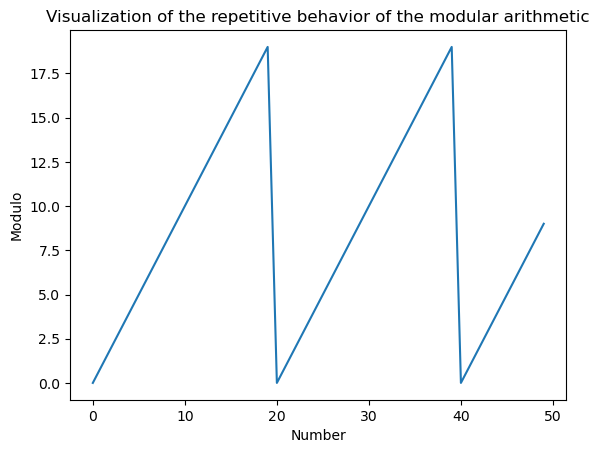

In [20]:
plt.plot(modulo)
plt.xlabel("Number")
plt.ylabel("Modulo")
plt.title("Visualization of the repetitive behavior of the modular arithmetic")
plt.show()

Now lets see how it will look like if we take the i as an exponent and our base it a prime number:

In [21]:
list_i = []
list_n = []
for i in range(1, 50):
    list_i.append(i)
    n = 3*i%11
    list_n.append(n)

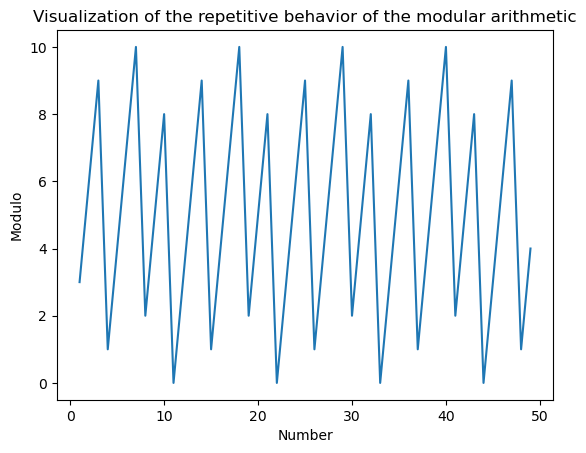

In [22]:
plt.plot(list_i,list_n)
plt.xlabel("Number")
plt.ylabel("Modulo")
plt.title("Visualization of the repetitive behavior of the modular arithmetic")
plt.show()

Interesting, we see that it is also repetitive, but the numbers are somehow randomly distributed. This is namely the base for the modular arithmetic and some cryptographic algorithms. So lets dive in and see how exactly does it work.

## II. Modular Arithmetic

#### 1. Properties of modular arithmetic

Of course, we should start with some theory and see what properties do we have in the modular arithmetic. There are a lot of different properties, but I will check only some of them which will be needed for the purpose in this project.

##### 1.1 Congruence

In [23]:
def is_congruent(a, b, modulo):
    remainder_a = a%modulo
    remainder_b = b%modulo
    if remainder_a == remainder_b:
        print(f"Yes, a ({a}) and b ({b}) are congruent, because they have the same remainder ({remainder_a}) when divided by {modulo}.")
    else:
        print(f"No, a ({a}) and b ({b}) are not congruent, because they do not have the same remainder when divided by {modulo}.")

In [24]:
is_congruent(4,7,3) #positive test with positive numbers
is_congruent(4,8,3) #negative test with positive numbers
is_congruent(-1, -4, 3) #positive test with negative numbers
is_congruent(-1, -5, 3) #negative test with negative numbers

Yes, a (4) and b (7) are congruent, because they have the same remainder (1) when divided by 3.
No, a (4) and b (8) are not congruent, because they do not have the same remainder when divided by 3.
Yes, a (-1) and b (-4) are congruent, because they have the same remainder (2) when divided by 3.
No, a (-1) and b (-5) are not congruent, because they do not have the same remainder when divided by 3.


##### 1.2 Addition

1.2.1. Addition property #1: <br>
$$ a + b = c \Rightarrow a ( \,mod N) \, + b ( \,mod N) \, \equiv c ( \,mod N) \, \vert a, b, c, N \in \mathbb{Z}$$

In [25]:
def addition_property_1(x_min, x_max, modulo):
    a = random_number(x_min, x_max)
    b = random_number(x_min, x_max)
    c = a+b
    
    if (a + b)%modulo == c%modulo:
        print(f"Yes, if a ({a}) + b ({b}) = c ({c}) then a(mod N) + b(mod N) is congruent to c(mod N).")
    else:
        print(f"No, the rule is not correct.")

In [26]:
addition_property_1(0, 1000, 3)

Yes, if a (575) + b (554) = c (1129) then a(mod N) + b(mod N) is congruent to c(mod N).


1.2.2 Addition property #2: 
$$ a \equiv b ( \,mod N) \, \Rightarrow a + k \equiv b + k ( \,mod N) \, \vert a, b, k, N \in \mathbb{Z}$$

In [27]:
def addition_property_2 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    k = random_number(x_min, x_max)
    while a%modulo != b%modulo:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        if a%modulo == b%modulo:
            if (a+k)%modulo == (b+k)%modulo:
                print(f"Yes, if a ({a}) mod N ({modulo}) and b ({b}) mod N ({modulo}) are congruent, then a+k(mod N) is congruent to b+k(mod N).")
            else:
                print(f"The random numbers a ({a}) and b ({b}) are not congruent.")

In [28]:
addition_property_2(0, 1000, 3)

Yes, if a (840) mod N (3) and b (585) mod N (3) are congruent, then a+k(mod N) is congruent to b+k(mod N).


1.2.3 Addition property #3:
$$ a \equiv b ( \,mod N) \land  c \equiv d ( \,mod N) \, \Rightarrow a + c \equiv b + d ( \,mod N) \, \vert a, b, c, d, N \in \mathbb{Z}$$

In [29]:
def addition_property_3 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    c = 1 #setting some value for c so that I can enter the while loop and search for a random number c.
    d = 1 #setting some value for d so that I can enter the while loop and search for a random number d.
    i = 0
    
    while i == 0:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        c = random_number(x_min, x_max)
        d = random_number(x_min, x_max)
  
        if a%modulo == b%modulo and c%modulo == d%modulo:
            if (a+c)%modulo == (b+d)%modulo:
                print(f"Yes, if a ({a}) and b ({b}) are congruent with modulo ({modulo}) and  c ({c}) and d ({d}) are congruent with modulo ({modulo}), then a + c (mod N) is congruent with b + d (mod N)")
                i +=1
            else:
                print(f"No, addition property #3 is not proven yet.")  
                i+=1
        else:
            pass
       

In [30]:
addition_property_3(0, 1000, 3)

Yes, if a (740) and b (176) are congruent with modulo (3) and  c (363) and d (75) are congruent with modulo (3), then a + c (mod N) is congruent with b + d (mod N)


1.2.4 Addition property #4:
$$ a \equiv b ( \,mod N) \Rightarrow -a \equiv -b ( \,mod N) \, \vert a, b, N \in \mathbb{Z}$$

In [31]:
def addition_property_4 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    i = 0
    while i == 0:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        if a%modulo == b%modulo:
            if -abs(a)%modulo == -abs(b)%modulo:
                print(f"Yes, if a ({a}) and b ({b}) are congruent with modulo ({modulo}), then their negative values are also congruent with this modulo.")
                i+=1
            else:
                print(f"No, addition property #4 is not proven yet.")
                i+=1
        else:
            pass

In [32]:
addition_property_4(0, 1000, 3)

Yes, if a (392) and b (686) are congruent with modulo (3), then their negative values are also congruent with this modulo.


Well, the 4 addition properties in the modular arithmetic has been proven with a function with random numbers and now we can use them in the project. But before I see what usecase do they have, I would like to prove couple of more properties so that I can use them after that as well.

##### 1.3 Multiplication

1.3.1 Multiplication property #1:
$$ a \times b = c \Rightarrow a ( \,mod N) \, \times b ( \,mod N) \,  \equiv c ( \,mod N) \, \vert a, b, c, N \in \mathbb{Z}$$

In [33]:
def multiplication_property_1 (x_min, x_max, modulo):
    a = random_number(x_min, x_max)
    b = random_number(x_min, x_max)
    c = a*b
    if (a%modulo)*(b%modulo) == c%modulo:
        print(f"Yes, if a ({a}) * b ({b}) = c ({c}) then a(mod N) * b(mod N) is congruent to c(mod N).")
    else:
        print(f"No, the rule is not correct.")

In [34]:
multiplication_property_1(0, 1000, 3)

Yes, if a (605) * b (447) = c (270435) then a(mod N) * b(mod N) is congruent to c(mod N).


1.3.2 Multiplication property #2:
$$ a \equiv b ( \,mod N) \, \Rightarrow k \times a \equiv k \times b ( \,mod N) \, \vert a, b, k, N \in \mathbb{Z}$$

In [35]:
def mutiplication_property_2 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    k = random_number(x_min, x_max)
    while a%modulo != b%modulo:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        if a%modulo == b%modulo:
            if (a*k)%modulo == (b*k)%modulo:
                print(f"Yes, if a ({a}) mod N ({modulo}) and b ({b}) mod N ({modulo}) are congruent, then a*k(mod N) is congruent to b*k(mod N).")
            else:
                print(f"The random numbers a ({a}) and b ({b}) are not congruent.")

In [36]:
mutiplication_property_2(0,1000,3)

Yes, if a (137) mod N (3) and b (386) mod N (3) are congruent, then a*k(mod N) is congruent to b*k(mod N).


1.3.3 Multiplication property #3:
$$ a \equiv b ( \,mod N) \, \land c \equiv d ( \,mod N) \, \Rightarrow a \times c \equiv b \times d ( \,mod N) \, \vert a, b, c, d, N \in \mathbb{Z}$$

In [37]:
def multiplication_property_3 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    c = 1 #setting some value for c so that I can enter the while loop and search for a random number c.
    d = 1 #setting some value for d so that I can enter the while loop and search for a random number d.
    i = 0
    
    while i == 0:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        c = random_number(x_min, x_max)
        d = random_number(x_min, x_max)
  
        if a%modulo == b%modulo and c%modulo == d%modulo:
            if (a*c)%modulo == (b*d)%modulo:
                print(f"Yes, if a ({a}) and b ({b}) are congruent with modulo ({modulo}) and  c ({c}) and d ({d}) are congruent with modulo ({modulo}), then a * c (mod N) is congruent with b * d (mod N)")
                i +=1
            else:
                print(f"No, addition property #3 is not proven yet.")  
                i+=1
        else:
            pass
       

In [38]:
multiplication_property_3(0,1000,3)

Yes, if a (855) and b (306) are congruent with modulo (3) and  c (779) and d (623) are congruent with modulo (3), then a * c (mod N) is congruent with b * d (mod N)


##### 1.4 Exponentiation

1.4.1 Exponentiation property #1:
$$ a \equiv b ( \,mod N) \, \Rightarrow a^k \equiv b^k ( \,mod N) \, \vert a, b, k, N \in \mathbb{Z}$$

In [39]:
def exponentiation_property_1 (x_min, x_max, modulo):
    a = 0 #setting some value for a so that I can enter the while loop and search for a random number a.
    b = 1 #setting some value for b so that I can enter the while loop and search for a random number b.
    k = random_number(x_min, x_max)
    while a%modulo != b%modulo:
        a = random_number(x_min, x_max)
        b = random_number(x_min, x_max)
        if a%modulo == b%modulo:
            if (a**k)%modulo == (b**k)%modulo:
                print(f"Yes, if a ({a}) mod N ({modulo}) and b ({b}) mod N ({modulo}) are congruent, then a**k(mod N) is congruent to b**k(mod N).")
            else:
                print(f"The random numbers a ({a}) and b ({b}) are not congruent.")

In [40]:
exponentiation_property_1(0,1000,3)

Yes, if a (640) mod N (3) and b (751) mod N (3) are congruent, then a**k(mod N) is congruent to b**k(mod N).


Ok, now we proved a lot of properties valid for the equivalence classes and the modular arithmetic, but why is that so important? What are the usecases of the equivalence classes and modular arithmetic in cryptography?

#### 2. Usecase in cryptography

Modular arithmetic is used in a lot of cryptographic methods. Some examples are:

##### 2.1. **Caesar Cipher**:
The encryption is based on shifting each letter in the message with an integer number k. For example if we want to use this encryption method to encrypt the message "Softuni" we can take a random number (lets say 3) and shift each letter in the word "Softuni" with 3 positions. So we get the following: S -> V, o -> r, f -> i etc and in the end we get the word "Vriwxql" which is the encryption of the word "Softuni" when each letter is shifted with 3 positions. The usage of the Caesar Cipher dates back to arount 100 BC and was used from Julius Caesar for sending secret messages to his generals. This method uses the modular arithmetic, because the lettes in each alphabet are finite and the last k letters in the message would not be replaceble. For example if we want to shift the letter "z" with 3 positions we go out of the alphabet, so we need to start again from the begining in order to make the cipher work.
[This photo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.math.uci.edu%2F~mathcircle%2Fmaterials%2FModular_Arithmetic_and_Cryptography_Jan22_2015.pdf&psig=AOvVaw3yYytzMWH3usoVau4k2L9M&ust=1683010206076000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCIjE2d7D0_4CFQAAAAAdAAAAABAF) illustrates it very well how the cipher works.

<center><img src = "Caesar_Cipher.png" style = "width: 400px; height: 400px"/><center>


##### 2.2. **RSA algorithm**:
It is used for message encryption and operates with two different keys - one public and one private key. This algorithm uses separate keys for encryption and decryption and thus it is called assymmetric-key algorithm. The encryption can be performed by anyone, but only authorized users are allowed to perform the decryption. It is considered as a safe algorithm, although it has its limitations. 
[The first photo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.javatpoint.com%2Frsa-encryption-algorithm&psig=AOvVaw1dv3uIqnPOETKJ5cPb5VIT&ust=1684133897348000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCPDV3eed9P4CFQAAAAAdAAAAABAi) below illustrates it very well how the cipher works at all and the [second photo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.javatpoint.com%2Frsa-encryption-algorithm&psig=AOvVaw1dv3uIqnPOETKJ5cPb5VIT&ust=1684133897348000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCPDV3eed9P4CFQAAAAAdAAAAABAZ) illustrates the role of moular arithmetic.

<center><img src = "RSA 2.png" ></center>

- The data to be sent is encrypted by sender A using the **public key of the intended receiver**.

- B **decrypts** the received ciphertext using its **private key**, which is known only to B. B replies to A **encrypting** its message using **A's public key**.

- A **decrypts** the received ciphertext using its **private key**, which is known only to him.
    
    
<center><img src = "RSA.png" ></center>

- Select two large prime numbers - **p** and **q**.
$$ p, q \in \mathbb{P} $$

- Multiply these numbers to find **n = p x q**, where **n** is called the modulus for encryption and decryption.

$$ n = p \times q $$

- Choose a number **e** less than **n**, such that **n** is relatively prime to **(p - 1) x (q -1)**. It means that **e** and **(p - 1) x (q - 1)** have no common factor except 1. Choose **e** such that 1<e<φ(n), e is prime to φ (n).<br>

$$\gcd{e,d(n)} = 1 \mid 1<e<\varphi(n) \land e, \varphi(n) \in \mathbb{P}$$

- If **n = p x q**, then the public key is **<e, n>**. A plaintext message **m** is encrypted using public key **<e, n>**. To find ciphertext from the plain text following formula is used to get ciphertext **C**. Here, **m** must be less than **n**. A larger message (>n) is treated as a concatenation of messages, each of which is encrypted separately.<br>

$$C = m^e\pmod {n} \mid m<n$$

- To determine the private key, we use the following formula to calculate the d such that:<br>

$$D_e\pmod {(p-1)\times(q-1)} = 1 \qquad or \qquad D_e\pmod {\varphi(n)} = 1$$



- The private key is **<d, n>**. A ciphertext message **c** is decrypted using private key **<d, n>**. To calculate plain text **m** from the ciphertext c following formula is used to get plain text m.<br>

$$m = c^d \pmod{n}$$

This is how it looks like in a real exaple:

<center><img src = "RSA 3.png" ></center>

Source:<br>
https://www.javatpoint.com/rsa-encryption-algorithm<br>
https://www.encryptionconsulting.com/diffie-hellman-key-exchange-vs-rsa/<br>

##### 2.3. **Diffie-Hellman algorithm**:
It is used for key exchange e.g establishing a shared secret key between two parties over an insecure communication channel. This algorithm uses the same keys for encryption and decryption and thus it is called symmetric-key algorithm. The encryption and decryption can be performed only by authorized people (only people who have access to the keys).
[The first photo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FDiffie%25E2%2580%2593Hellman_key_exchange&psig=AOvVaw1SnVybRBDkLqLdRcNyS81E&ust=1684136627408000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCJj1y_2n9P4CFQAAAAAdAAAAABAt) below illustrates it very well how the algorithm works at all and the [second photo](https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.noser.com%2Fasymmetric-cryptography-diffie-hellman-key-exchange%2F&psig=AOvVaw1SnVybRBDkLqLdRcNyS81E&ust=1684136627408000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCJj1y_2n9P4CFQAAAAAdAAAAABAE) illustrates the role of moular arithmetic.

<center><img src = "DH 2.png" width="500" height="600" ></center>

- Bob picks two prime numbers, **g** and **p** and tells them to Alice. These numbers are public.
$$ g, p \in \mathbb{P}$$

- Alice then picks a secret number - **a** (private key), and then it computes **ga mod p** and sends the result ( **A** ) - back to Bob. *Keep in mind that the secret number is not sent to anyone, only the result is.*

$$A = g^a \pmod{p}$$

- Then Bob does the same. He selects a secret number **b** (private key) and calculates **gb mod p** and sends the result **B** to Alice.

$$B = g^b \pmod{p}$$

- Alice takes the received number **B** and calculates **Ba mod p**.

$$S = B^a \pmod{p}$$

- Bob takes the received number **A** and calculates **Ab mod p**.

$$S = A^b \pmod{p}$$

- Both of them get the same result **S**.
    
    
<center><img src = "DH.png" width="500" height="600"></center>

Another popular illustration way of this complex cryptography algorithm is using the color explanation:

<center><img src = "DH 3.png" ></center>

Sources:<br>
https://blog.noser.com/asymmetric-cryptography-diffie-hellman-key-exchange/<br>
https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange<br>
https://www.educba.com/diffie-hellman-key-exchange-algorithm/<br>

#### 3. RSA Algorithm

##### 3.1. **RSA Algorithm - Step by Step Recreation**

In [41]:
# 1.Generating the p (the first prime number):

flag = False
p = int(input("Please enter a desired number for p:"))

while p<=1:
    print("Please check your input number for p. It is <= 1 and thus can not be prime.")
    p = int(input("Please enter a desired number for p:"))
    
if p>1:
    for i in range (2, p):
        while flag == False:
            if (p%i) == 0:
                p = int(input("Your input for p is not a prime number. Please enter another number for p:"))
            else:
                print(f"Yes, p {p} is prime.")
                flag = True
                break


Please enter a desired number for p: 7


Yes, p 7 is prime.


In [42]:
# 2.Generating the q (the second prime number):

flag = False
q = int(input("Please enter a desired number for q:"))

while q<=1:
    print("Please check your input number for q. It is <= 1 and thus can not be prime.")
    q = int(input("Please enter a desired number for q:"))
    
if q>1:
    for i in range (2, q):
        while flag == False:
            if (q%i) == 0:
                q = int(input("Your input for q is not a prime number. Please enter another number for q:"))
            else:
                print(f"Yes, q {q} is prime.")
                flag = True
                break

Please enter a desired number for q: 3


Yes, q 3 is prime.


In [43]:
def calculating_the_mod(p,q):
    n = p*q
    return n

In [44]:
# 3.Calculating the mod (part 1 of the public key):

n = calculating_the_mod(p,q)
print(f"n is {n}")

n is 21


In [45]:
# 4. Calculating the phi(n):

def euler(p,q):
    phi_n = (p-1)*(q-1)
    return phi_n

In [46]:
phi_n = euler(p,q)
print(f"Phi(n) is {phi_n}")

Phi(n) is 12


In [47]:
# 5. Choosing e (part 2 of the public key):

flag = False
e = int(input("Please enter your desired number for e:"))
while flag == False:
    if e > 1 and e < phi_n and math.gcd(e, phi_n) == 1:
        flag = True
        print(f"Perfect choise for e = {e}")
        break
    else:
        e = int(input("Your choice for e does not meet the criterias. Please enter another number for e:"))

Please enter your desired number for e: 5


Perfect choise for e = 5


In [48]:
# 6. Calculating d (private key):

flag = False
d = 1

while flag == False:
    if (e*d-1)%phi_n == 0:
        flag = True
        print(f"The exponent of the private key d is {d}")
    else:
        d+=1

The exponent of the private key d is 5


In [49]:
# 7. Lets summarize what values do we have so far:

print(f"The value for p is {p}.")
print(f"The value for q is {q}.")
print(f"The value for n is {n}.")
print(f"The value for Phi(n) is {phi_n}.")
print(f"The value for e is {e}.")
print(f"The value for d is {d}.")

The value for p is 7.
The value for q is 3.
The value for n is 21.
The value for Phi(n) is 12.
The value for e is 5.
The value for d is 5.


In [50]:
# 8. Encrypting the plaintext m into a ciphertext c:

def encryption_rsa(m, e, n):
    c = m**e%n
    return c

In [51]:
# First I will generate a random number m to encrypt:
m = random.randint(0, n)
print(f"The message that will be encrypted is {m}")
c = encryption_rsa(m, e, n)
print(f"The decrypted text is: {c}")

The message that will be encrypted is 16
The decrypted text is: 4


In [52]:
# 9. Decrypting the ciphertext:

def decryption_rsa(c, d, n):
    m = c**d%n
    return m

In [53]:
decrypted_m = decryption_rsa (c, d, n)
print(f"The original message is: {decrypted_m}.")

The original message is: 16.


In [54]:
# 10. Double check:

if m == decrypted_m:
    print("Your algorithm works correctly")
else:
    print("Check your algorithm. There must be a mistake somewhere")

Your algorithm works correctly


##### 3.2 Hack the RSA Algorithm

3.2.1 **Step by step recreation (eavesdropping side):**<br>
Ok, it was easy and strightforward to test the RSA algorithm if we have all the elements needed incl. private key, but would it be so easy if it is unknown? I would like to test it with couple of prime numbers and let's see.

In [55]:
p = 3
q = 7
n = calculating_the_mod(p,q)
phi_n = euler(p,q)
e = 5
m = random.randint(0, n)
c = encryption_rsa(m, e, n)

These will be our values for testing. This first test will be with small prime numbers just to be sure that everything works fine. The message m is unknown for us and we have to find it out. At the end I will print it to double check.

In [56]:
# 1. Let's try to guess the original message:

list_m = []
for supposed_m in range (0, 100): #keeping the range realtively small so that the troubleshooting is easier.
    if c == supposed_m**e%n:
        list_m.append(supposed_m)
        
print(f"The supposed possible values for the original message are: {list_m}")

The supposed possible values for the original message are: [3, 24, 45, 66, 87]


In [57]:
# 2. Let's try to check the possible values for the exponent d in the private key:

list_d = []
for supposed_d in range(0,100): #keeping the range realtively small so that the troubleshooting is easier.
    if (e*supposed_d-1)%phi_n == 0:
        list_d.append(supposed_d)

print(f"The supposed possible values for the private key exponent d are: {list_d}")

The supposed possible values for the private key exponent d are: [5, 17, 29, 41, 53, 65, 77, 89]


In [58]:
# 3. Now we will find out all the possible combinations of m and d that satisfy the conditions.

i = 0
for supposed_m in list_m:
    for supposed_d in list_d:
        if supposed_m == c**supposed_d%n:
            i+=1
            print(f"Possible combination #{i} is: m = {supposed_m} and d = {supposed_d}.")

Possible combination #1 is: m = 3 and d = 5.
Possible combination #2 is: m = 3 and d = 17.
Possible combination #3 is: m = 3 and d = 29.
Possible combination #4 is: m = 3 and d = 41.
Possible combination #5 is: m = 3 and d = 53.
Possible combination #6 is: m = 3 and d = 65.
Possible combination #7 is: m = 3 and d = 77.
Possible combination #8 is: m = 3 and d = 89.


In [59]:
# 4. Now let's see what was the original message:
print(f"The original message m, randomly generated, is {m}")

The original message m, randomly generated, is 3


Well, we managed to find out the correct original message, but we still can not be sure which is the exponent d. We have only some guesses, but we can not be sure. This test #1 was made with the smallest prime numbers and thus it was pretty easy. Let's see how it will look like if we take some bigger prime numbers. For the purpose I would like to create a function that combines the steps so that I can test with different numbers easier:

3.2.2. **Function recreation:**<br>

In [60]:
def hacking_the_rsa(p, q, e, m_range, d_range):

    n = calculating_the_mod(p,q)
    phi_n = euler(p,q)
    m = random.randint(0, n)
    c = encryption_rsa(m, e, n)
# 1. Let's try to guess the original message:

    list_m = []
    for supposed_m in range (0, m_range): #I will cut the range at 100000, just not to overheat the program.
        if c == supposed_m**e%n:
            list_m.append(supposed_m)

    print(f"The supposed possible values for the original message are: {list_m}")

# 2. Let's try to check the possible values for the exponent d in the private key:

    list_d = []
    for supposed_d in range(0,d_range): #I will cut the range at 100000, just not to overheat the program.
        if (e*supposed_d-1)%phi_n == 0:
            list_d.append(supposed_d)

    print(f"The supposed possible values for the private key exponent d are: {list_d}")

# 3. Now we will find out all the possible combinations of m and d that satisfy the conditions.

    i = 0
    supposed_m_list = []
    for supposed_m in list_m:
        for supposed_d in list_d:
            if supposed_m == c**supposed_d%n:
                if supposed_m not in supposed_m_list:
                    supposed_m_list.append(supposed_m)
                i+=1
                #print(f"Possible combination #{i} is: m = {supposed_m} and d = {supposed_d}.")
    print(f"The possible combinations of the supposed message m and supposed exponent d are: {i}")
    print(f"The supposed message(s) m are: {supposed_m_list}")
            
# 4. Now let's see what was the original message:
    print(f"The original message m, randomly generated, is {m}")
    
# 5. Double check with the decrypting function + time function to measure the time needed for the calculation:
    start = time.time()
    for d in list_d:
        m = decryption_rsa(c, d, n)
    end = time.time()
    print(f"The time needed for the calculation is: {end-start}")

3.2.3 **Testing**:

In [61]:
hacking_the_rsa(3, 7, 5, 10000, 10000)

The supposed possible values for the original message are: [13, 34, 55, 76, 97, 118, 139, 160, 181, 202, 223, 244, 265, 286, 307, 328, 349, 370, 391, 412, 433, 454, 475, 496, 517, 538, 559, 580, 601, 622, 643, 664, 685, 706, 727, 748, 769, 790, 811, 832, 853, 874, 895, 916, 937, 958, 979, 1000, 1021, 1042, 1063, 1084, 1105, 1126, 1147, 1168, 1189, 1210, 1231, 1252, 1273, 1294, 1315, 1336, 1357, 1378, 1399, 1420, 1441, 1462, 1483, 1504, 1525, 1546, 1567, 1588, 1609, 1630, 1651, 1672, 1693, 1714, 1735, 1756, 1777, 1798, 1819, 1840, 1861, 1882, 1903, 1924, 1945, 1966, 1987, 2008, 2029, 2050, 2071, 2092, 2113, 2134, 2155, 2176, 2197, 2218, 2239, 2260, 2281, 2302, 2323, 2344, 2365, 2386, 2407, 2428, 2449, 2470, 2491, 2512, 2533, 2554, 2575, 2596, 2617, 2638, 2659, 2680, 2701, 2722, 2743, 2764, 2785, 2806, 2827, 2848, 2869, 2890, 2911, 2932, 2953, 2974, 2995, 3016, 3037, 3058, 3079, 3100, 3121, 3142, 3163, 3184, 3205, 3226, 3247, 3268, 3289, 3310, 3331, 3352, 3373, 3394, 3415, 3436, 3457, 34

KeyboardInterrupt: 

Seems interesting, there are a lot of possible scenarios for d even if we get the m correct. Thus, we can never be sure that we got the correct d so that we can decipher messages in the future. Furthermore, we have a limit of 10000 and in the real life there is no limit which means that the possible combinations would be much much more. 

In [62]:
hacking_the_rsa(31, 47, 37, 10000, 10000)

The supposed possible values for the original message are: [337, 1794, 3251, 4708, 6165, 7622, 9079]
The supposed possible values for the private key exponent d are: [373, 1753, 3133, 4513, 5893, 7273, 8653]
The possible combinations of the supposed message m and supposed exponent d are: 7
The supposed message(s) m are: [337]
The original message m, randomly generated, is 337
The time needed for the calculation is: 0.007082939147949219


In [63]:
hacking_the_rsa(409, 661, 547, 10000, 10000)

The supposed possible values for the original message are: []
The supposed possible values for the private key exponent d are: []
The possible combinations of the supposed message m and supposed exponent d are: 0
The supposed message(s) m are: []
The original message m, randomly generated, is 96203
The time needed for the calculation is: 0.0


Interesting, the calculation with the smallest prime numbers took most time, because there are a lot of possible combinations and although the calculation are much simplier, it could not compensate the time. Now I will modify mu initial function so that we get back just the time measured. I am sure that it works correctly and I want just to check the time for multiple limit values.

3.2.4 **Function optimization**

In [64]:
def hacking_the_rsa(p, q, e, m_range, d_range):
    start = time.time()
    n = calculating_the_mod(p,q)
    phi_n = euler(p,q)
    m = random.randint(0, n)
    c = encryption_rsa(m, e, n)
# 1. Let's try to guess the original message:

    list_m = []
    for supposed_m in range (0, m_range): #I will cut the range at 100000, just not to overheat the program.
        if c == supposed_m**e%n:
            list_m.append(supposed_m)

    #print(f"The supposed possible values for the original message are: {list_m}")

# 2. Let's try to check the possible values for the exponent d in the private key:

    list_d = []
    for supposed_d in range(0,d_range): #I will cut the range at 100000, just not to overheat the program.
        if (e*supposed_d-1)%phi_n == 0:
            list_d.append(supposed_d)

    #print(f"The supposed possible values for the private key exponent d are: {list_d}")

# 3. Now we will find out all the possible combinations of m and d that satisfy the conditions.

    i = 0
    supposed_m_list = []
    for supposed_m in list_m:
        for supposed_d in list_d:
            if supposed_m == c**supposed_d%n:
                if supposed_m not in supposed_m_list:
                    supposed_m_list.append(supposed_m)
                i+=1
                #print(f"Possible combination #{i} is: m = {supposed_m} and d = {supposed_d}.")
    #print(f"The possible combinations of the supposed message m and supposed exponent d are: {i}")
    #print(f"The supposed message(s) m are: {supposed_m_list}")
            
# 4. Now let's see what was the original message:
    #print(f"The original message m, randomly generated, is {m}")
    
# 5. Double check with the decrypting function + time function to measure the time needed for the calculation:
    for d in list_d:
        m = decryption_rsa(c, d, n)
    end = time.time()
    time_measured = end-start
    return time_measured

3.2.5 **Testing 2.0 and Result Visualization**

In [65]:
m_range_list = [1000, 5000, 10000, 50000]
d_range_list = [1000, 5000, 10000, 50000]

In [66]:
time_1_digit_numbers = []
for m in m_range_list:
    time_measured = hacking_the_rsa(3, 7, 5, m, d_range=m)
    time_1_digit_numbers.append(time_measured)
    print(f"The time needed for the calculation is at m and d = {m}: {time_measured} seconds")

The time needed for the calculation is at m and d = 1000: 0.01596856117248535 seconds
The time needed for the calculation is at m and d = 5000: 2.884822368621826 seconds
The time needed for the calculation is at m and d = 10000: 33.314093828201294 seconds
The time needed for the calculation is at m and d = 50000: 7758.822840690613 seconds


In [67]:
time_2_digit_numbers = []

for m in m_range_list:
    time_measured = hacking_the_rsa(31, 47, 37, m, d_range=m)
    time_2_digit_numbers.append(time_measured)
    print(f"The time needed for the calculation is at m and d = {m}: {time_measured} seconds")

The time needed for the calculation is at m and d = 1000: 0.001707315444946289 seconds
The time needed for the calculation is at m and d = 5000: 0.00873565673828125 seconds
The time needed for the calculation is at m and d = 10000: 0.028849363327026367 seconds
The time needed for the calculation is at m and d = 50000: 10.608489274978638 seconds


In [68]:
time_3_digit_numbers = []
for m in m_range_list:
    time_measured = hacking_the_rsa(149, 157, 173, m, d_range=m)
    time_3_digit_numbers.append(time_measured)
    print(f"The time needed for the calculation is at m and d = {m}: {time_measured} seconds")

The time needed for the calculation is at m and d = 1000: 0.0020058155059814453 seconds
The time needed for the calculation is at m and d = 5000: 0.012778997421264648 seconds
The time needed for the calculation is at m and d = 10000: 0.028587818145751953 seconds
The time needed for the calculation is at m and d = 50000: 0.399369478225708 seconds


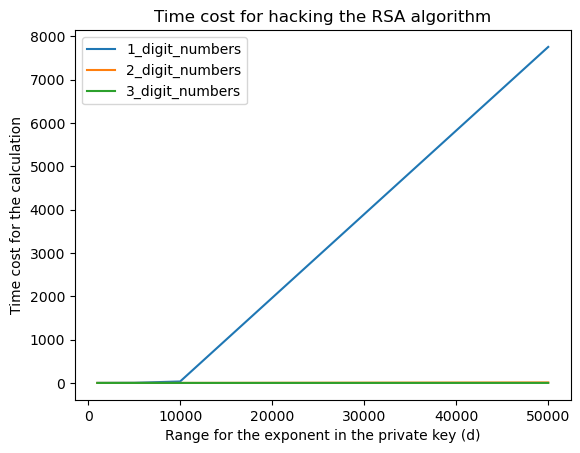

In [69]:
plt.plot(d_range_list, time_1_digit_numbers, label = "1_digit_numbers")
plt.plot(d_range_list, time_2_digit_numbers, label = "2_digit_numbers")
plt.plot(d_range_list, time_3_digit_numbers, label = "3_digit_numbers")
plt.xlabel("Range for the exponent in the private key (d)")
plt.ylabel("Time cost for the calculation")
plt.title("Time cost for hacking the RSA algorithm")
plt.legend()
plt.show()

Well, pretty interesting result. We can see that the calculation take much more time with 1-digit prime numbers in comparison with 2- and 3-digit-numbers. How can this be possible? Well using the brute force attack we need to calculate each possible number for d and as the 1-digit prime number for p, q and e generate much more possible combinations, it is then much harder to calculate each possible outcome. But the calculation itself is much easier. If we use much bigger numbers for d the calculation will be very complicated, because d is an exponent. Thus, it will make more sense. Furthermore we can see that the 3-digit prime numbers can not find any appropriate d in the first three scenarios (1000, 5000, 10000) and they can make any calculation as soon as I set the range for d = 50000. They will get much stronger if I use d range e.g billions or even bigger numbers. However, my computer does not have enough capacity to make such calculation so that I can show it, but thats namely why the RSA algorithm is so secure.<br>
I would like to set m (our original message) to be 100000 (bigger than in the first test) and for d I will leave the same values as in the first test. Let's see what will happen.

In [70]:
time_1_digit_numbers_2 = []

for d in d_range_list:
    time_measured = hacking_the_rsa(3, 7, 5, m_range=100000, d_range = d)
    time_1_digit_numbers_2.append(time_measured)
    print(f"The time needed for the calculation is at m = 100000 and d = {d}: {time_measured} seconds")

The time needed for the calculation is at m = 100000 and d = 1000: 1.1137821674346924 seconds
The time needed for the calculation is at m = 100000 and d = 5000: 51.154290199279785 seconds
The time needed for the calculation is at m = 100000 and d = 10000: 451.34048652648926 seconds
The time needed for the calculation is at m = 100000 and d = 50000: 28182.902260303497 seconds


In [71]:
time_2_digit_numbers_2 = []

for d in d_range_list:
    time_measured = hacking_the_rsa(31, 47, 37, m_range=100000, d_range = d)
    time_2_digit_numbers_2.append(time_measured)
    print(f"The time needed for the calculation is at m = 100000 and d = {d}: {time_measured} seconds")

The time needed for the calculation is at m = 100000 and d = 1000: 0.10937690734863281 seconds
The time needed for the calculation is at m = 100000 and d = 5000: 0.18924260139465332 seconds
The time needed for the calculation is at m = 100000 and d = 10000: 0.34053802490234375 seconds
The time needed for the calculation is at m = 100000 and d = 50000: 10.4884774684906 seconds


In [72]:
time_3_digit_numbers_2 = []

for d in d_range_list:
    time_measured = hacking_the_rsa(149, 157, 173, m_range=100000, d_range = d)
    time_3_digit_numbers_2.append(time_measured)
    print(f"The time needed for the calculation is at m = 100000 and d = {d}: {time_measured} seconds")

The time needed for the calculation is at m = 100000 and d = 1000: 0.5446512699127197 seconds
The time needed for the calculation is at m = 100000 and d = 5000: 0.5362720489501953 seconds
The time needed for the calculation is at m = 100000 and d = 10000: 0.5557258129119873 seconds
The time needed for the calculation is at m = 100000 and d = 50000: 0.7116708755493164 seconds


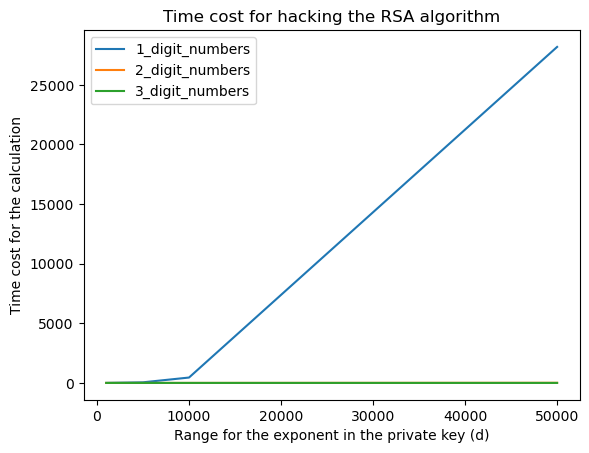

In [73]:
plt.plot(d_range_list, time_1_digit_numbers_2, label = "1_digit_numbers")
plt.plot(d_range_list, time_2_digit_numbers_2, label = "2_digit_numbers")
plt.plot(d_range_list, time_3_digit_numbers_2, label = "3_digit_numbers")
plt.xlabel("Range for the exponent in the private key (d)")
plt.ylabel("Time cost for the calculation")
plt.title("Time cost for hacking the RSA algorithm")
plt.legend()
plt.show()

Well, this did not change that much, but we can make another interesting observation. The first time when a calculation is made successfully with the higher prime numbers, the calculation takes much more time than the first time when the time gets calculated with the smallest prime numbers.

#### 4. Diffie Hellman Method

##### 4.1. **Diffie Hellman Method - Step by Step Recreation**

We already know how Diffie Hellman Method works. First I would like to make a step-by-step recreation of the model. The same thing I did for the RSA algorithm. Thus I will check  that my recreation works correctly and then I will make functions so that I can test then with multiple input values.

In [75]:
# 1. Generating the public base:

flag = False
p = int(input("Please enter a desired number for p:"))

while p<=1:
    print("Please check your input number for p. It is <= 1 and thus can not be prime.")
    p = int(input("Please enter a desired number for p:"))
    
if p>1:
    for i in range (2, p):
        while flag == False:
            if (p%i) == 0:
                p = int(input("Your input for p is not a prime number. Please enter another number for p:"))
            else:
                print(f"Yes, p {p} is prime.")
                flag = True
                break

Please enter a desired number for p: 4
Your input for p is not a prime number. Please enter another number for p: 8
Your input for p is not a prime number. Please enter another number for p: 7


Yes, p 7 is prime.


In [76]:
# 2. Generating the public modulus:

flag = False
g = int(input("Please enter a desired number for g:"))

while g<=1 or g>=p:
    print("Please check your input number for g. It is <= 1 or >p and thus does not meet the criteria.")
    g = int(input("Please enter a desired number for g:"))
    
if g>1:
    for i in range (2, g):
        while flag == False:
            if (g%i) == 0:
                g = int(input("Your input for g is not a prime number. Please enter another number for g:"))
            else:
                print(f"Yes, g {g} is prime and <p.")
                flag = True
                break


Please enter a desired number for g: 4
Your input for g is not a prime number. Please enter another number for g: 8
Your input for g is not a prime number. Please enter another number for g: 3


Yes, g 3 is prime and <p.


In [77]:
# 3. Generating the private keys:
flag = False
a_private = int(input("Enter the private key of user A: "))
b_private = int(input("Enter the private key of user B: "))
while flag == False:
    if a_private >= p or b_private >= p or a_private <= 0 or b_private <= 0:
        print(f"Private key of both the users should be less than {p} and more than 0!")
        a_private = int(input("Enter the private key of user A: "))
        b_private = int(input("Enter the private key of user B: "))
    else:
        flag =  True
        print(f"The chosen private keys for user A {a_private} and user B {b_private} meet the criterias.")
        break

Enter the private key of user A:  6
Enter the private key of user B:  8


Private key of both the users should be less than 7 and more than 0!


Enter the private key of user A:  5
Enter the private key of user B:  4


The chosen private keys for user A 5 and user B 4 meet the criterias.


In [78]:
# 4. Calculating the public keys:

a_public, b_public = g**a_private%p, g**b_private%p
print(f"The public key of user A which he gives to B is: {a_public}")
print(f"The public key of user B which he gives to A is: {b_public}")

The public key of user A which he gives to B is: 5
The public key of user B which he gives to A is: 4


In [79]:
# 5. Generating the secrete keys:

a_secret, b_secret = b_public**a_private%p, a_public**b_private%p

print(f"The secret key for user 1 is: {a_secret}")
print(f"The secret key for user 2 is: {b_secret}")

The secret key for user 1 is: 2
The secret key for user 2 is: 2


In [80]:
# 6. Double check:

if a_secret == b_secret:
    print("Keys have been exchanged successfully")
else:
    print("Keys have not been exchanged successfully")

Keys have been exchanged successfully


Well, our model seems to work. 

##### 4.2 Hack the Diffie Hellman Method

4.2.1 **Step by step recreation - eavesdropping side:**<br>

I will first prepare the model (eavesdropping side) with step-by-step recreation. 

In [81]:
# 1. Choosing p and g, which are public:

p = 57
g = 13

In [82]:
# 2. Choosing the private keys of both user A and user B, which will be unknown for the eavesdropping side.

a_private = 29
b_private = 27

In [83]:
# 3. Calculating the public keys:

a_public, b_public = g**a_private%p, g**b_private%p
print(f"The public key of user A which he gives to B is: {a_public}")
print(f"The public key of user B which he gives to A is: {b_public}")

The public key of user A which he gives to B is: 40
The public key of user B which he gives to A is: 37


In [84]:
# 4. The Brute Force attack:

private_keys_A = []
private_keys_B = []
for a_private in range (1,p):
    for b_private in range (1,p):
        if a_public**a_private%p == b_public**b_private%p:
            print(f"The private key combination might be: user A = {a_private}, user B = {b_private}")
            private_keys_A.append(a_private)
            private_keys_B.append(b_private)

The private key combination might be: user A = 9, user B = 1
The private key combination might be: user A = 9, user B = 3
The private key combination might be: user A = 9, user B = 5
The private key combination might be: user A = 9, user B = 7
The private key combination might be: user A = 9, user B = 9
The private key combination might be: user A = 9, user B = 11
The private key combination might be: user A = 9, user B = 13
The private key combination might be: user A = 9, user B = 15
The private key combination might be: user A = 9, user B = 17
The private key combination might be: user A = 9, user B = 19
The private key combination might be: user A = 9, user B = 21
The private key combination might be: user A = 9, user B = 23
The private key combination might be: user A = 9, user B = 25
The private key combination might be: user A = 9, user B = 27
The private key combination might be: user A = 9, user B = 29
The private key combination might be: user A = 9, user B = 31
The private k

Ook, so we now have many possible scenarios for private keys of user A and user B that meet our criteria. However, the eavesdropping side knows also the public keys, so lets see whether he will be able to calculate.

In [85]:
# 5. Reducing the list with possible values for the private key of user A:

private_key_A_reduced = []
for a_private in private_keys_B:
    if a_public == g**a_private%p:
        if a_private not in private_key_A_reduced:
            private_key_A_reduced.append(a_private)

print(f"The private key of user A is one of: {private_key_A_reduced}")

The private key of user A is one of: [11, 29, 47]


In [86]:
# 6. Reducing the list with possible values for the private key of user B:

private_key_B_reduced = []
for b_private in private_keys_A:
    if b_public == g**b_private%p:
         if b_private not in private_key_B_reduced:
            private_key_B_reduced.append(b_private)

        
print(f"The private key of user A is one of: {private_key_B_reduced}")

The private key of user A is one of: [9, 27, 45]


Well, we have three possible vaues for each private key and thus we can not be sure which one is the correct private key of user A and user B. In this situation we can try to guess the secret key calculating the possible outcome with all the values:

In [87]:
# 7. Double check for the secret key of both user (must be the same):

for a_private in private_key_A_reduced:
    a_secret = b_public**a_private%p
    print(f"The secret key for user 1 is: {a_secret}")
    
for b_private in private_key_B_reduced:
    b_secret = a_public**b_private%p
    print(f"The secret key for user 2 is: {b_secret}")

The secret key for user 1 is: 37
The secret key for user 1 is: 37
The secret key for user 1 is: 37
The secret key for user 2 is: 37
The secret key for user 2 is: 37
The secret key for user 2 is: 37


Nice, we managed to guess the secret value even if we were not sure about the private keys. However, this should not be so easy if we use more complex prime numbers. That is exactly what I want to test, but first I will create a function of the whole process.

4.2.2. **Function recreation:**

In [88]:
# 1. Generating the public base:
def generating_p(p):
    flag = False
    while p<=1:
        print("Please check your input number for p. It is <= 1 and thus can not be prime.")
        p = int(input("Please enter a desired number for p:"))

    if p>1:
        for i in range (2, p):
            while flag == False:
                if (p%i) == 0:
                    p = int(input("Your input for p is not a prime number. Please enter another number for p:"))
                else:
                    print(f"Yes, p {p} is prime.")
                    flag = True
                    break
    
# 2. Generating the public modulus:
def generating_g(g):
    flag = False

    while g<=1 or g>=p:
        print("Please check your input number for g. It is <= 1 or >p and thus does not meet the criteria.")
        g = int(input("Please enter a desired number for g:"))

    if g>1:
        for i in range (2, g):
            while flag == False:
                if (g%i) == 0:
                    g = int(input("Your input for g is not a prime number. Please enter another number for g:"))
                else:
                    print(f"Yes, g {g} is prime and <p.")
                    flag = True
                    break

# 3. Generating the private keys:
def generating_private_keys(a_private, b_private):
    flag = False
    while flag == False:
        if a_private >= p or b_private >= p or a_private <= 0 or b_private <= 0:
            print(f"Private key of both the users should be less than {p} and more than 0!")
            a_private = int(input("Enter the private key of user A: "))
            b_private = int(input("Enter the private key of user B: "))
        else:
            flag =  True
            print(f"The chosen private keys for user A {a_private} and user B {b_private} meet the criterias.")
            break

# 4. Calculating the public keys:
def calculating_public_keys(p, g, a_private, b_private):
    a_public, b_public = g**a_private%p, g**b_private%p
    print(f"The public key of user A which he gives to B is: {a_public}")
    print(f"The public key of user B which he gives to A is: {b_public}")


# 5. The Brute Force attack:
def brute_force_attack(p, a_public, b_public):
    private_keys_A = []
    private_keys_B = []
    for a_private in range (1,p):
        for b_private in range (1,p):
            if a_public**a_private%p == b_public**b_private%p:
                print(f"The private key combination might be: user A = {a_private}, user B = {b_private}")
                private_keys_A.append(a_private)
                private_keys_B.append(b_private)

# 6. Reducing the list with possible values for the private key of user A:
def calculating_possible_private_keys_A(p, g, a_public, private_keys_B):
    private_key_A_reduced = []
    for a_private in private_keys_B:
        if a_public == g**a_private%p:
            if a_private not in private_key_A_reduced:
                private_key_A_reduced.append(a_private)

    print(f"The private key of user A is one of: {private_key_A_reduced}")

# 7. Reducing the list with possible values for the private key of user B:
def calculating_possible_private_keys_B(p, g, b_public, private_keys_A):
    private_key_B_reduced = []
    for b_private in private_keys_A:
        if b_public == g**b_private%p:
             if b_private not in private_key_B_reduced:
                private_key_B_reduced.append(b_private)


    print(f"The private key of user A is one of: {private_key_B_reduced}")

And now I will combine the functions in one function:

In [89]:
# 1. Generating the public base:
def hacking_the_df(p, g, a_private, b_private):
    flag = False
    while p<=1:
        print("Please check your input number for p. It is <= 1 and thus can not be prime.")
        p = int(input("Please enter a desired number for p:"))

    if p>1:
        for i in range (2, p):
            while flag == False:
                if (p%i) == 0:
                    p = int(input("Your input for p is not a prime number. Please enter another number for p:"))
                else:
                    print(f"Yes, p {p} is prime.")
                    flag = True
                    break
    
# 2. Generating the public modulus:
    
    flag = False
    while g<=1 or g>=p:
        print("Please check your input number for g. It is <= 1 and thus can not be prime.")
        g = int(input("Please enter a desired number for g:"))

    if g>1:
        for i in range (2, g):
            while flag == False:
                if (g%i) == 0:
                    g = int(input("Your input for g is not a prime number. Please enter another number for g:"))
                else:
                    print(f"Yes, g {g} is prime and <p.")
                    flag = True
                    break

# 3. Generating the private keys:
    flag = False
    while flag == False:
        if a_private >= p or b_private >= p or a_private <= 0 or b_private <= 0:
            print(f"Private key of both the users should be less than {p} and more than 0!")
            a_private = int(input("Enter the private key of user A: "))
            b_private = int(input("Enter the private key of user B: "))
        else:
            flag =  True
            print(f"The chosen private keys for user A {a_private} and user B {b_private} meet the criterias.")
            break

# 4. Calculating the public keys:
    a_public, b_public = g**a_private%p, g**b_private%p
    print(f"The public key of user A which he gives to B is: {a_public}")
    print(f"The public key of user B which he gives to A is: {b_public}")


# 5. The Brute Force attack:
    private_keys_A = []
    private_keys_B = []
    for a_private in range (1,p):
        for b_private in range (1,p):
            if a_public**a_private%p == b_public**b_private%p:
                print(f"The private key combination might be: user A = {a_private}, user B = {b_private}")
                private_keys_A.append(a_private)
                private_keys_B.append(b_private)

# 6. Reducing the list with possible values for the private key of user A:
    private_key_A_reduced = []
    for a_private in private_keys_B:
        if a_public == g**a_private%p:
            if a_private not in private_key_A_reduced:
                private_key_A_reduced.append(a_private)

    print(f"The private key of user A is one of: {private_key_A_reduced}")

# 7. Reducing the list with possible values for the private key of user B:
    private_key_B_reduced = []
    for b_private in private_keys_A:
        if b_public == g**b_private%p:
             if b_private not in private_key_B_reduced:
                private_key_B_reduced.append(b_private)


    print(f"The private key of user A is one of: {private_key_B_reduced}")

In [90]:
hacking_the_df(23, 5, 6, 15)

Yes, p 23 is prime.
Yes, g 5 is prime and <p.
The chosen private keys for user A 6 and user B 15 meet the criterias.
The public key of user A which he gives to B is: 8
The public key of user B which he gives to A is: 19
The private key combination might be: user A = 1, user B = 18
The private key combination might be: user A = 2, user B = 14
The private key combination might be: user A = 3, user B = 10
The private key combination might be: user A = 4, user B = 6
The private key combination might be: user A = 5, user B = 2
The private key combination might be: user A = 6, user B = 20
The private key combination might be: user A = 7, user B = 16
The private key combination might be: user A = 8, user B = 12
The private key combination might be: user A = 9, user B = 8
The private key combination might be: user A = 10, user B = 4
The private key combination might be: user A = 11, user B = 22
The private key combination might be: user A = 12, user B = 18
The private key combination might be:

Well, veeery nica, our hacking algorithm works perfectly. I tested it with input values from the Wikipedia example.<br>
Source: https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange<br>

However, we can see that we managed to hack it and guess exactly the private keys. This can happen, if we use too small numbers for base and modulus. Thats why I would like to test with some more complex numbers.

4.2.3 **Testing**

In [91]:
hacking_the_df(107, 89, 54, 29)

Yes, p 107 is prime.
Yes, g 89 is prime and <p.
The chosen private keys for user A 54 and user B 29 meet the criterias.
The public key of user A which he gives to B is: 89
The public key of user B which he gives to A is: 42
The private key combination might be: user A = 1, user B = 11
The private key combination might be: user A = 1, user B = 64
The private key combination might be: user A = 2, user B = 22
The private key combination might be: user A = 2, user B = 75
The private key combination might be: user A = 3, user B = 33
The private key combination might be: user A = 3, user B = 86
The private key combination might be: user A = 4, user B = 44
The private key combination might be: user A = 4, user B = 97
The private key combination might be: user A = 5, user B = 2
The private key combination might be: user A = 5, user B = 55
The private key combination might be: user A = 6, user B = 13
The private key combination might be: user A = 6, user B = 66
The private key combination might

In [92]:
hacking_the_df(293, 47, 60, 48)

Yes, p 293 is prime.
Yes, g 47 is prime and <p.
The chosen private keys for user A 60 and user B 48 meet the criterias.
The public key of user A which he gives to B is: 124
The public key of user B which he gives to A is: 33
The private key combination might be: user A = 1, user B = 56
The private key combination might be: user A = 1, user B = 129
The private key combination might be: user A = 1, user B = 202
The private key combination might be: user A = 1, user B = 275
The private key combination might be: user A = 2, user B = 39
The private key combination might be: user A = 2, user B = 112
The private key combination might be: user A = 2, user B = 185
The private key combination might be: user A = 2, user B = 258
The private key combination might be: user A = 3, user B = 22
The private key combination might be: user A = 3, user B = 95
The private key combination might be: user A = 3, user B = 168
The private key combination might be: user A = 3, user B = 241
The private key combina

In [93]:
hacking_the_df(881, 131, 48, 2)

Yes, p 881 is prime.
Yes, g 131 is prime and <p.
The chosen private keys for user A 48 and user B 2 meet the criterias.
The public key of user A which he gives to B is: 16
The public key of user B which he gives to A is: 422
The private key combination might be: user A = 1, user B = 24
The private key combination might be: user A = 1, user B = 464
The private key combination might be: user A = 2, user B = 48
The private key combination might be: user A = 2, user B = 488
The private key combination might be: user A = 3, user B = 72
The private key combination might be: user A = 3, user B = 512
The private key combination might be: user A = 4, user B = 96
The private key combination might be: user A = 4, user B = 536
The private key combination might be: user A = 5, user B = 120
The private key combination might be: user A = 5, user B = 560
The private key combination might be: user A = 6, user B = 144
The private key combination might be: user A = 6, user B = 584
The private key combina

Ok, we can see that our model predicts correctly the private keys, but with the increase of the base and the modulo it takes much more time to do the calculation, because there are many more possible combinations. It would be interesting then to measure the time and test with some really big numbers as it would be in the real life.

4.2.4 **Function optimization**

In [94]:
# 1. Generating the public base:
def hacking_the_df_optimized(p, g, a_private, b_private):
    flag = False
    while p<=1:
        print("Please check your input number for p. It is <= 1 and thus can not be prime.")
        p = int(input("Please enter a desired number for p:"))

    if p>1:
        for i in range (2, p):
            while flag == False:
                if (p%i) == 0:
                    p = int(input("Your input for p is not a prime number. Please enter another number for p:"))
                else:
                    #print(f"Yes, p {p} is prime.")
                    flag = True
                    break
    
# 2. Generating the public modulus:
    
    flag = False
    while g<=1 or g>=p:
        print("Please check your input number for g. It is <= 1 or >p and thus does not meet the criteria.")
        g = int(input("Please enter a desired number for g:"))

    if g>1:
        for i in range (2, g):
            while flag == False:
                if (g%i) == 0:
                    g = int(input("Your input for g is not a prime number. Please enter another number for g:"))
                else:
                    #print(f"Yes, g {g} is prime and <p.")
                    flag = True
                    break

# 3. Generating the private keys:
    flag = False
    while flag == False:
        if a_private >= p or b_private >= p or a_private <= 0 or b_private <= 0:
            print(f"Private key of both the users should be less than {p} and more than 0!")
            a_private = int(input("Enter the private key of user A: "))
            b_private = int(input("Enter the private key of user B: "))
        else:
            flag =  True
            #print(f"The chosen private keys for user A {a_private} and user B {b_private} meet the criterias.")
            break

# 4. Calculating the public keys:
    a_public, b_public = g**a_private%p, g**b_private%p
    #print(f"The public key of user A which he gives to B is: {a_public}")
    #print(f"The public key of user B which he gives to A is: {b_public}")


# 5. The Brute Force attack:
    time_list = []
    start = time.time()
    private_keys_A = []
    private_keys_B = []
    for a_private in range (1,p):
        for b_private in range (1,p):
            if a_public**a_private%p == b_public**b_private%p:
                #print(f"The private key combination might be: user A = {a_private}, user B = {b_private}")
                private_keys_A.append(a_private)
                private_keys_B.append(b_private)

# 6. Reducing the list with possible values for the private key of user A:
    private_key_A_reduced = []
    for a_private in private_keys_B:
        if a_public == g**a_private%p:
            if a_private not in private_key_A_reduced:
                private_key_A_reduced.append(a_private)

    #print(f"The private key of user A is one of: {private_key_A_reduced}")

# 7. Reducing the list with possible values for the private key of user B:
    private_key_B_reduced = []
    for b_private in private_keys_A:
        if b_public == g**b_private%p:
             if b_private not in private_key_B_reduced:
                private_key_B_reduced.append(b_private)


    #print(f"The private key of user A is one of: {private_key_B_reduced}")
    end = time.time()
    time_measured = end-start
    time_list.append(time_measured)
    print(time_list)

In [95]:
hacking_the_df_optimized(23, 5, 6, 15)

[0.0]


Perfect, it looks now better. I cut some unnecessary information that have been printed. I introduced the time function so that we can measure the time needed for the calculation and now it's Testing 2.0 time.

4.2.5 **Testing 2.0**

In [96]:
# 1. I will create a list with 5 values for p and g:

p_list = [179, 643, 1229, 5281]
g_list = [71, 463, 563, 3943]

In [97]:
# 2. Then I will test with the above specified values and lets see.

time_list = []
for i in range(len(p_list)):
    start = time.time()
    hacking_the_df_optimized(p_list[i], g_list[i], random.randint(1,p_list[i]), random.randint(1,p_list[i]))
    end = time.time()
    time_measured = end-start
    time_list.append(time_measured)
    
print(time_list)

[0.08503341674804688]
[4.786287546157837]
[48.351940870285034]
[11493.441160917282]
[0.08503341674804688, 4.786287546157837, 48.351940870285034, 11493.4495947361]


4.2.6 **Result Visualization**

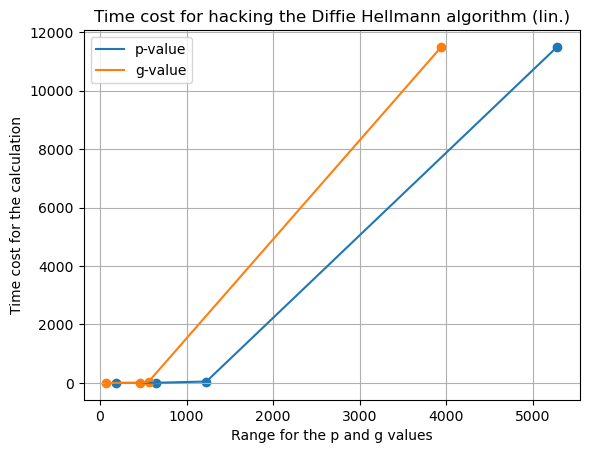

In [98]:
# Lets then plot out results and see how the plot will look like:

plt.plot(p_list, time_list, label = "p-value")
plt.plot(g_list, time_list, label = "g-value")
plt.xlabel("Range for the p and g values")
plt.ylabel("Time cost for the calculation")
plt.title("Time cost for hacking the Diffie Hellmann algorithm (lin.)")
plt.legend()
plt.scatter(p_list, time_list)
plt.scatter(g_list, time_list)
plt.grid()
plt.show()

Wow, we can see that a relativ small increase in our p and g values led to a skyrocketing of the calculation time. We can only imagine, if we use really big numbers for p and g value.
I will plot the same chart again but this time will use logarithmic scale.

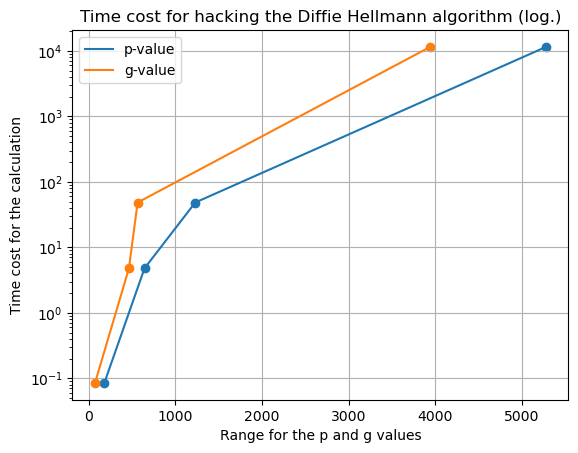

In [99]:
plt.plot(p_list, time_list, label = "p-value")
plt.plot(g_list, time_list, label = "g-value")
plt.xlabel("Range for the p and g values")
plt.ylabel("Time cost for the calculation")
plt.title("Time cost for hacking the Diffie Hellmann algorithm (log.)")
plt.legend()
plt.scatter(p_list, time_list)
plt.scatter(g_list, time_list)
plt.grid()
plt.yscale("log")
plt.show()

#### 5. Comparison and Conclusion

Well, after researched two of the most known and used cryptographic methods - the RSA and the Diffie Hellman, we can make a comparison of both of them.<br>

<center><img src = "RSA vs DH.png" ></center>


Diffie-Hellman and RSA are both popular cryptographic algorithms used for secure key exchange, but they differ in several ways:<br>

1. **Key Exchange vs. Encryption**: Diffie-Hellman is a key exchange algorithm, while RSA is an encryption algorithm. Diffie-Hellman is used to securely establish a shared secret key between two parties over an insecure communication channel, whereas RSA is used to encrypt and decrypt messages.
2. **Symmetric vs. Asymmetric**: Diffie-Hellman is a symmetric-key algorithm, while RSA is an asymmetric-key algorithm. This means that Diffie-Hellman uses the same key for encryption and decryption, while RSA uses different keys for encryption and decryption.
3. **Key Strength**: RSA is generally considered to be stronger than Diffie-Hellman in terms of key strength. RSA can use much larger key sizes than Diffie-Hellman, making it more difficult to crack.
4. **Processing Time**: RSA encryption and decryption is typically faster than Diffie-Hellman key exchange. This is because RSA only requires one exponentiation, while Diffie-Hellman requires multiple exponentiations.
5. **Perfect Forward Secrecy**: Diffie-Hellman provides perfect forward secrecy, meaning that even if an attacker were to obtain the private keys of one party, they would not be able to decrypt past messages. RSA does not provide perfect forward secrecy.<br>

Source:<br>
https://www.geeksforgeeks.org/difference-between-diffie-hellman-and-rsa/

**Conclusion:**<br>

We can clearly see how the modular arithmetic is vital for the cryptography and how some of the most used algorithms and methods in the cryptography work based on the modular arithmetic (which is based on equivalence classes). Thanks to these math concepts/theories we live in our moder world where we can securely browse in internet, shop online, sign documents online, save passwords on websites and much more.<br>
However the human factor in the world of cyber security plays the most important role. The algorithms used nowadays to ensure our digital security are very reliable, but if and only if the human behind the hardware acts accordingly. This means nto to fall for a scam. The attackers are mostly very good educated in cyber security and know how to mislead the victim and make him do a mistake.<br>
This will be definitely a great challenge in the next decade. On the one side, to educate company workers, families, kids etc not to fall for e.g a fishing attack and on the other side to further improve the security so that attackers can not break into that easily. Building more and more CPU cabale computers will also make the algorithms more vulnerable, but as soon this happens the ethical hackers will definitely have a new solution for more secure algorithm.

#### 6. Bonus: Case study

Task:<br>

John wants to share his testament with his family. He owns 100 Bitcoins and wants to make sure that his family has an access to his fortune when he dies. However, he also must be careful, because somebody might get his testament before his family does it and thats why he decides to encrypt his message and only a person with the key could encrypt it. <br>
Our task would be to encrypt the message once with Caesar Cipher and once with RSA and then try to break it.<br>

The testament (original message):<br>
*Dear family,
if you read this, then it is high time to share you that I own a fortune and I want to share with it with you. My fortune is one hundred bitcoins in the ledger and here is how you can get it:<br>
First, you need to find my Ledger wallet - it is under the sofa.<br>
Second, you need to connect it and unlock it with the PIN code - seven, five, three, one, four, two.<br>
Third, you can transfer the bitcoins there to an exchange or bitcoinmat so that you can get cash instead.<br>
In case you need the recovery phrases, you can find them unter the mattress of the bed in my bedroom.<br>
Best regards, John.*

In [100]:
message = "Dear family, if you read this, then it is high time to share you that I own a fortune and I want to share with it with you. My fortune is one hundred bitcoins in the ledger and here is how you can get it: First, you need to find my Ledger wallet - it is under the sofa. Second, you need to connect it and unlock it with the PIN code - seven, five, three, one, four, two. Third, you can transfer the bitcoins there to an exchange or bitcoinmat so that you can get cash instead. In case you need the recovery phrases, you can find them unter the mattress of the bed in my bedroom. Best regards, John."

##### 6.1 Caesar Cipher

In [101]:
def encrypt_caesar(message,n):
    text = ""
    # iterate over the given text
    for i in range(len(message)):
        ch = message[i]
        
        # check if space is there then simply add space
        if ch==" ":
            text+=" "
        elif ch == ",":
            text+=","
        elif ch == ".":
            text+="."
        # check if a character is uppercase then encrypt it accordingly 
        elif (ch.isupper()):
            text += chr((ord(ch) + n-65) % 26 + 65)
        # check if a character is lowercase then encrypt it accordingly
        else:
            text += chr((ord(ch) + n-97) % 26 + 97)
    
    return text

Perfect, now we have can encrypt the message, but the question is how to share the key and how many letters to shift. John decides to use his date of birthas it does not change and gives his woman the key in privat. John is born on 06.01.1995 and the key would be:<br> 6 + 0 + 0 + 1 + 1 + 9 + 9 + 5 = 31

In [102]:
encrypt_caesar(message,31)

'Ijfw kfrnqd, nk dtz wjfi ymnx, ymjs ny nx mnlm ynrj yt xmfwj dtz ymfy N tbs f ktwyzsj fsi N bfsy yt xmfwj bnym ny bnym dtz. Rd ktwyzsj nx tsj mzsiwji gnyhtnsx ns ymj qjiljw fsi mjwj nx mtb dtz hfs ljy nys Knwxy, dtz sjji yt knsi rd Qjiljw bfqqjy f ny nx zsijw ymj xtkf. Xjhtsi, dtz sjji yt htssjhy ny fsi zsqthp ny bnym ymj UNS htij f xjajs, knaj, ymwjj, tsj, ktzw, ybt. Ymnwi, dtz hfs ywfsxkjw ymj gnyhtnsx ymjwj yt fs jchmfslj tw gnyhtnsrfy xt ymfy dtz hfs ljy hfxm nsxyjfi. Ns hfxj dtz sjji ymj wjhtajwd umwfxjx, dtz hfs knsi ymjr zsyjw ymj rfyywjxx tk ymj gji ns rd gjiwttr. Gjxy wjlfwix, Otms.'

Well, lets now test how easy would be for an eavesdropper to decipher the message if he finds it:

In [103]:
def decrypt_caesar(decrypted_message, k):
    small_letters = "abcdefghijklmnopqrstuvwxyz"
    capital_letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    decrypted_message = ""

    for ch in message:

        if ch in small_letters:
            position = small_letters.find(ch)
            new_pos = (position - k) % 26
            new_char = small_letters[new_pos]
            decrypted_message += new_char
        elif ch in capital_letters:
            position = capital_letters.find(ch)
            new_pos = (position - k) % 26
            new_char = capital_letters[new_pos]
            decrypted_message += new_char
        else:
            decrypted_message += ch
            
    print("Your decrypted message is:\n")
    print(decrypted_message)

In [104]:
decrypted_message = "Ijfw kfrnqd, nk dtz wjfi ymnx, ymjs ny nx mnlm ynrj yt xmfwj dtz ymfy N tbs f ktwyzsj fsi N bfsy yt xmfwj bnym ny bnym dtz. Rd ktwyzsj nx tsj mzsiwji gnyhtnsx ns ymj qjiljw fsi mjwj nx mtb dtz hfs ljy nys Knwxy, dtz sjji yt knsi rd Qjiljw bfqqjy f ny nx zsijw ymj xtkf. Xjhtsi, dtz sjji yt htssjhy ny fsi zsqthp ny bnym ymj UNS htij f xjajs, knaj, ymwjj, tsj, ktzw, ybt. Ymnwi, dtz hfs ywfsxkjw ymj gnyhtnsx ymjwj yt fs jchmfslj tw gnyhtnsrfy xt ymfy dtz hfs ljy hfxm nsxyjfi. Ns hfxj dtz sjji ymj wjhtajwd umwfxjx, dtz hfs knsi ymjr zsyjw ymj rfyywjxx tk ymj gji ns rd gjiwttr. Gjxy wjlfwix, Otms."

In [105]:
start = time.time()
for i in range (1, 27):
    decrypt_caesar(decrypted_message, i)
end = time.time()

Your decrypted message is:

Cdzq ezlhkx, he xnt qdzc sghr, sgdm hs hr ghfg shld sn rgzqd xnt sgzs H nvm z enqstmd zmc H vzms sn rgzqd vhsg hs vhsg xnt. Lx enqstmd hr nmd gtmcqdc ahsbnhmr hm sgd kdcfdq zmc gdqd hr gnv xnt bzm fds hs: Ehqrs, xnt mddc sn ehmc lx Kdcfdq vzkkds - hs hr tmcdq sgd rnez. Rdbnmc, xnt mddc sn bnmmdbs hs zmc tmknbj hs vhsg sgd OHM bncd - rdudm, ehud, sgqdd, nmd, entq, svn. Sghqc, xnt bzm sqzmredq sgd ahsbnhmr sgdqd sn zm dwbgzmfd nq ahsbnhmlzs rn sgzs xnt bzm fds bzrg hmrsdzc. Hm bzrd xnt mddc sgd qdbnudqx ogqzrdr, xnt bzm ehmc sgdl tmsdq sgd lzssqdrr ne sgd adc hm lx adcqnnl. Adrs qdfzqcr, Ingm.
Your decrypted message is:

Bcyp dykgjw, gd wms pcyb rfgq, rfcl gr gq fgef rgkc rm qfypc wms rfyr G mul y dmprslc ylb G uylr rm qfypc ugrf gr ugrf wms. Kw dmprslc gq mlc fslbpcb zgramglq gl rfc jcbecp ylb fcpc gq fmu wms ayl ecr gr: Dgpqr, wms lccb rm dglb kw Jcbecp uyjjcr - gr gq slbcp rfc qmdy. Qcamlb, wms lccb rm amllcar gr ylb sljmai gr ugrf rfc NGL ambc - qctcl, dgt

Well that was fast..lets see how much time did it cost:

In [106]:
measured_time = end - start
measured_time

0.009101629257202148

Just a couple of seconds to brute force the message. even if we do not know the key..there are only 26 letters in the alphabet and thus we need at most 26 attempts to decipher the message. Of course it can be made more complicated if we use other special characters and do not separate spaces, commas etc, but it still can be broken veery fast if the eavesdropping side knows the message.

Sources:
https://www.scaler.com/topics/caesar-cipher-python/

##### 6.1 RSA Algorithm

In [107]:
public_key, private_key = rsa.newkeys(8129)
print(f"The public key is: {public_key}")
print(f"The private key is: {private_key}")

The public key is: PublicKey(37121404953183249028130350315672831035669714421301717830645046300279602710692832528157568578261648691908680934265550331500929047053227177572933119694433573173454959703883768720875059293541013062753632541930713578633644499416006061338441063944505972954205393583410830189227318212202657620173365450851868404645320935966863069294514408642384328373057868274106032326928255161320027717246388177002505061826550386781585828846796652034977614062058848386338631139041294042796515172008062659775693133733186719466058238677479395231658452585592270714246304241358410415015818655280582605504752738751855037933208251040715959026797990526781376487369086375412860727901995628741760932346917859855942435419506128293212007292898178433203858722102449701346790199833998428970793878386458627021203991318553470009111363512178295727465345138799334299010264084870823666988961041744216872352697139100417265505115805715947711965085394509241667997035846975312149248939200867164486279314611080997733

In [108]:
encrypted_message = rsa.encrypt(message.encode(), public_key)
encrypted_message

b'S.\x03\x97\xcd\'\xa0\x07\xff8\xd9\x95=\x12a\xd6\xbb\x8d>\x9b\xf2\x87\x81<\r:/\x96h\xe3\xbc\x13\x00#)\xf3\xbb\xa8\x0f\x9f\xa9-\xbdSB\xc7\xc3\xca#{8X\xdc<(s\xf0\xeb!e\xdc?\xddJ\xe2\x8ai\xd0\x1c\xcc\x11\x96\xe5a\x8b$\x8e\xf7\x8f:\xf8\x90*kg\x91L\xdc\xea\x04\x8d\xc1\xa9\xe2\x16 \xb9\xe4\x99\x0e*\xaa\xf2\xa3\xe8\xc2\t\xd8\xc0\xf6\xd6i\xdb\x81\xa8\xdf4\xd6\xd7|\xbd\r\xa9?\x9c\xa7\xdc\x8d\xab\xf8\xca\x97\xd5\xfex`~E\xae\xfaA\x95<\xf2ZT\xa9\'1\x071\xc0^^DD&\x01sP\xad8;\xa3{\x1bU\x92Bw\x91%\xd5\xce\xa0\xc0\xf3\x95 \xc89\x90\xf9\xa1O+\x0c\xcb\x96<\xde\xae\xc1\\\xa4g\xd0\x90\xad\x16\xdc+7_\xaf\xe2\xc0\xb5\xb4\xf9\xc1A\x82 \x7fq\xee\xeaC\xdf\xcd\xab\x98\xc0\x0f\xba\x011\x1c-\xc7\r\xb5%2\xbb\x0c:\x02\xd1\xdb\x8c\x7f\xa7\xb0;c~h\x83\xea\xdf\xaf<\x96\xa51\xe1;\x06!\xc1=9\xc9\xf8\x83\x8ef\xd2\xaerKh\x9f\x08\xf9\xedxa\t\xe8\xb6\xaaXc\xa8Y\xf5\x1f}\x17w\x05\x168\xab\xff\xc8\xcf\x8a\x13\xcf\xa9\x04\x8f\xb8\x83\x03\x8b\xffP!\xbfOdMn&\xe8\xe5\xda\xe2\xd2\'\xad\xf6y\xf8!\x94\x7f\xc5\x91)\xb8\xc4\xb3\x93K\

Well, our message can be encrypted with at least 8129-bits keys. I wanted to try to encrypt it with smaller numbers and then try to break it, but with such numbers it would be too much time consuming to even try to do it.<br>

In this case it should be clear that John should use the RSA encryption if he wants to be save, but he should find a way to share secretle the private key to his wife. Or he must in advance create for his wife public and private keys so that he can encrypt his message with her public key and she would be able to decrypt it after that with her private key. However, in this case she will be able to decrypt it sooner if she finds the message. Well, there are some decisions that John needs to take, but he definitely should use the RSA encryption.